# The Reactions of the German Stock Market to COVID-19 and Containment Policies: A Vector Autoregressive Analysis

## 12. Estimation of VAR-Model

In [1]:
# Importing the necessary python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

%matplotlib inline

In [2]:
# Load in the previosuly prepared datasets
sample_1 = pd.read_csv("transformed_data_sample_1.csv", parse_dates=["date"], index_col="date")
sample_2 = pd.read_csv("transformed_data_sample_2.csv", parse_dates=["date"], index_col="date")
sample_full = pd.read_csv("transformed_data_sample_full.csv", parse_dates=["date"], index_col="date")

In [3]:
# Create a vector auto regressive model (VAR) for all samples timeframes
# Include dummy variables as exogen variables [ Y(t) = ß0 + ß1*Y(t-1) + ... + ßp*Y(t-p) + B*D(t) + e(t) ] -> No lags!

# VAR model for all first wave sample
model_1 = VAR(endog=sample_1[["new_cases_pct", "stringency_diff", "hdax_pct"]],
              exog=sample_1[["Monday", "Tuesday", "Wednesday", "Thursday"]],
              missing='none')

# VAR model for all second wave sample
model_2 = VAR(endog=sample_2[["new_cases_pct", "stringency_diff","hdax_pct", ]],
              exog=sample_2[["Monday", "Tuesday", "Wednesday", "Thursday"]],
              missing='none')

# VAR model for full sample timeframe
model_full = VAR(endog=sample_full[["new_cases_pct", "stringency_diff", "hdax_pct", ]],
              exog=sample_full[["Monday", "Tuesday", "Wednesday", "Thursday"]],
              missing='none')

/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [4]:
# Show how many lags different information criterions suggest for first sample
model_1.select_order(trend='c').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [5]:
# Show how many lags different information criterions suggest for second sample
model_2.select_order(trend='c').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [6]:
# Show how many lags different information criterions suggest for full sample timeframe
model_full.select_order(trend='c').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [7]:
# Write a function to find a leg-lenght at which
# the portmonteau test's H0: "Absence of significant residual autocorrelations"
# is failed to be rejected, signifying a lag-structure suitable for VAR-estimations
# As per Lütkepohl a large nlags (h) is necessary to use the Portmanteau test, so we use 1/4 of the observations as h
    
def lags_whiteness(models_dict, significance = 0.05):
    result_list = []
    for key, model in models_dict.items():
        n = 1
        while True:
            results = model.fit(n)
            test = results.test_whiteness(int(results.nobs*0.25), signif=significance, adjusted=False)
            test_statistic = test.test_statistic
            critical_value = test.crit_value
            if test_statistic < critical_value:
                break
            n = n + 1
        result_list.append(key + ": No significant autocorrelation at " + str(n) + " lags.")
    return result_list

In [8]:
# For the three different samples, use the above function
models = {"Model_Sample_1": model_1, "Model_Sample_2": model_2, "Model_Sample_full": model_full}

lags_whiteness(models)


['Model_Sample_1: No significant autocorrelation at 1 lags.',
 'Model_Sample_2: No significant autocorrelation at 1 lags.',
 'Model_Sample_full: No significant autocorrelation at 6 lags.']

In [9]:
# Getting the result from the regression of the models
results_1 = model_1.fit(ic='aic')
results_2 = model_2.fit(ic='aic')
results_full = model_full.fit(6)

In [11]:
# Getting the summary of the results for the first sample period
results_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Sep, 2021
Time:                     09:33:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -4.04280
Nobs:                     140.000    HQIC:                  -5.01571
Log likelihood:          -120.234    FPE:                 0.00345259
AIC:                     -5.68171    Det(Omega_mle):      0.00207112
--------------------------------------------------------------------
Results for equation new_cases_pct
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.406079         0.263053            1.544           0.123
Monday                    -0.552083         0.357514           -1.544           0.123
Tuesday                   -0.067

In [12]:
# Getting the summary of the results for the second sample period
results_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Sep, 2021
Time:                     09:33:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.92778
Nobs:                     186.000    HQIC:                  -9.17534
Log likelihood:           101.225    FPE:                8.75020e-05
AIC:                     -9.34401    Det(Omega_mle):     7.71173e-05
--------------------------------------------------------------------
Results for equation new_cases_pct
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.023543         0.120812           -0.195           0.845
Monday                    -0.382550         0.167677           -2.281           0.023
Tuesday                    0.739

In [13]:
# Getting the summary of the results for the full sample period
results_full.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Sep, 2021
Time:                     09:33:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.36433
Nobs:                     329.000    HQIC:                  -6.84286
Log likelihood:          -153.596    FPE:                0.000777229
AIC:                     -7.16046    Det(Omega_mle):     0.000634612
--------------------------------------------------------------------
Results for equation new_cases_pct
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.215979         0.136128            1.587           0.113
Monday                    -0.469913         0.183545           -2.560           0.010
Tuesday                    0.303

## 12. Plotting of Results

### 12.1 Plotting Results for first sample timeframe

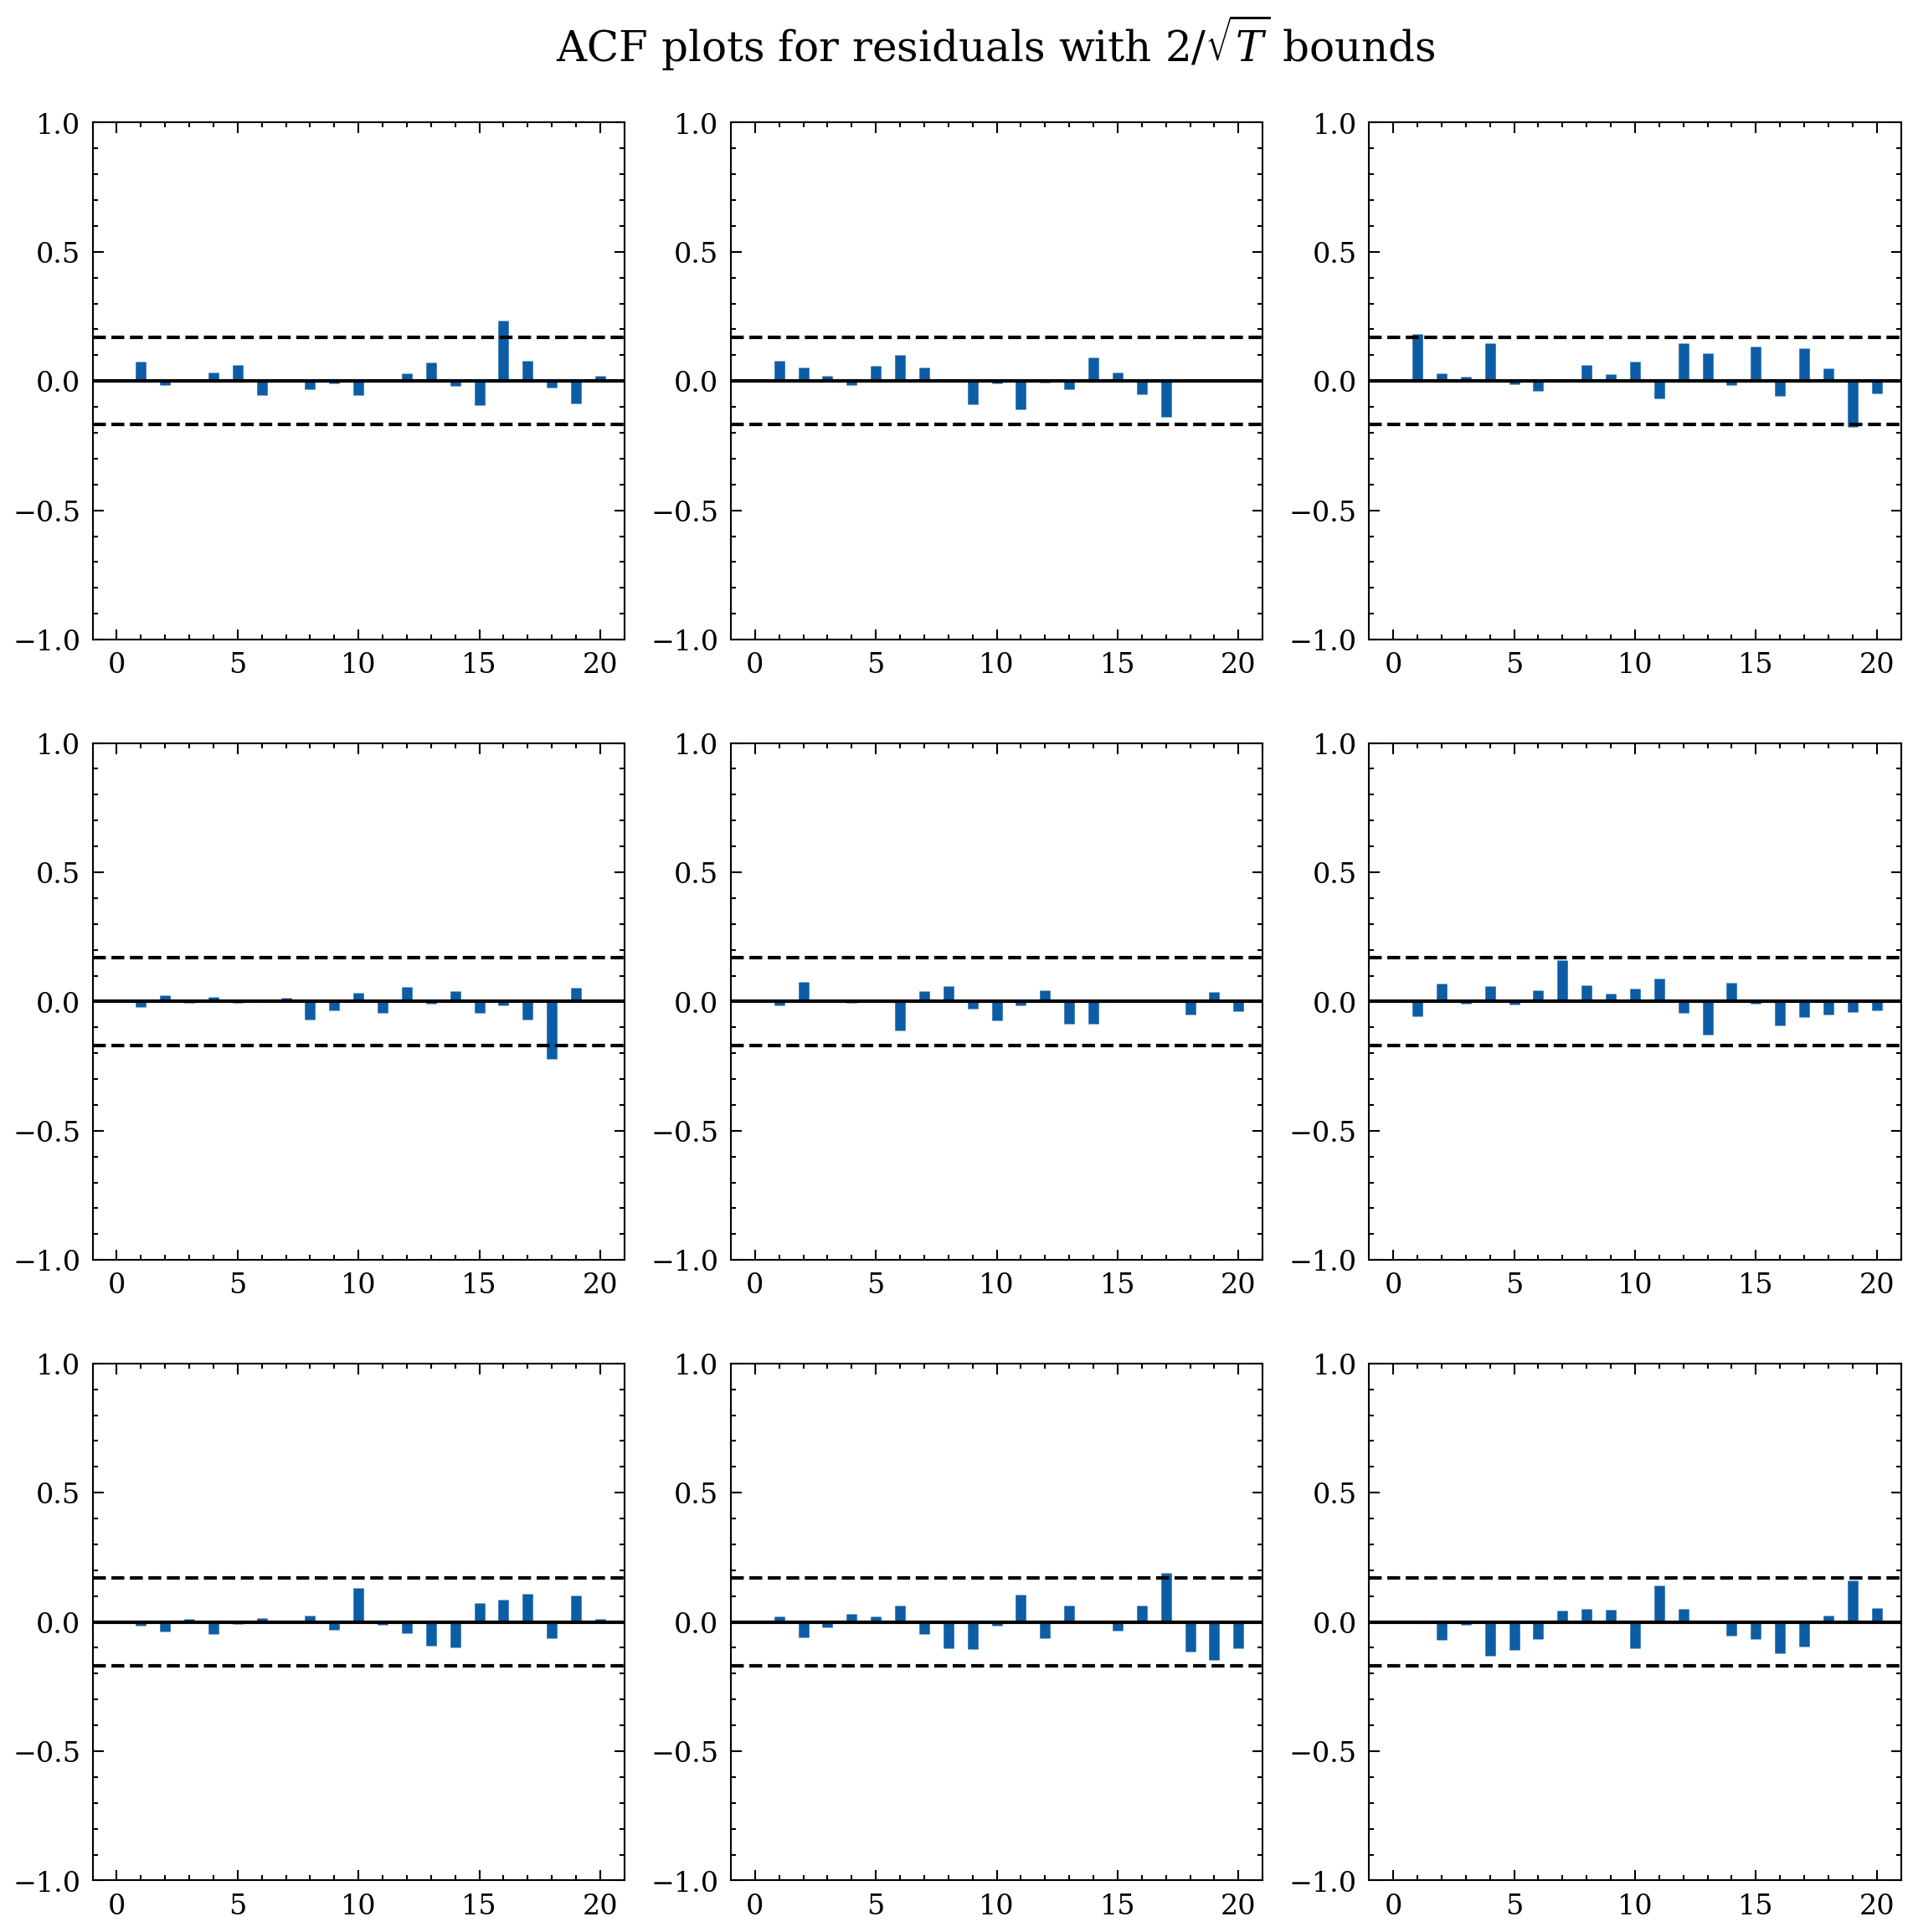

In [14]:
plt.style.use(['science','no-latex'])
results_1_plot_acorr = results_1.plot_acorr(nlags=20, resid=True, linewidth=3)
results_1_plot_acorr.set_size_inches(8, 8)
results_1_plot_acorr.set_dpi(300)
results_1_plot_acorr.savefig("acf_plots_1.pdf")

### 12.2 Plotting Results for second sample timeframe

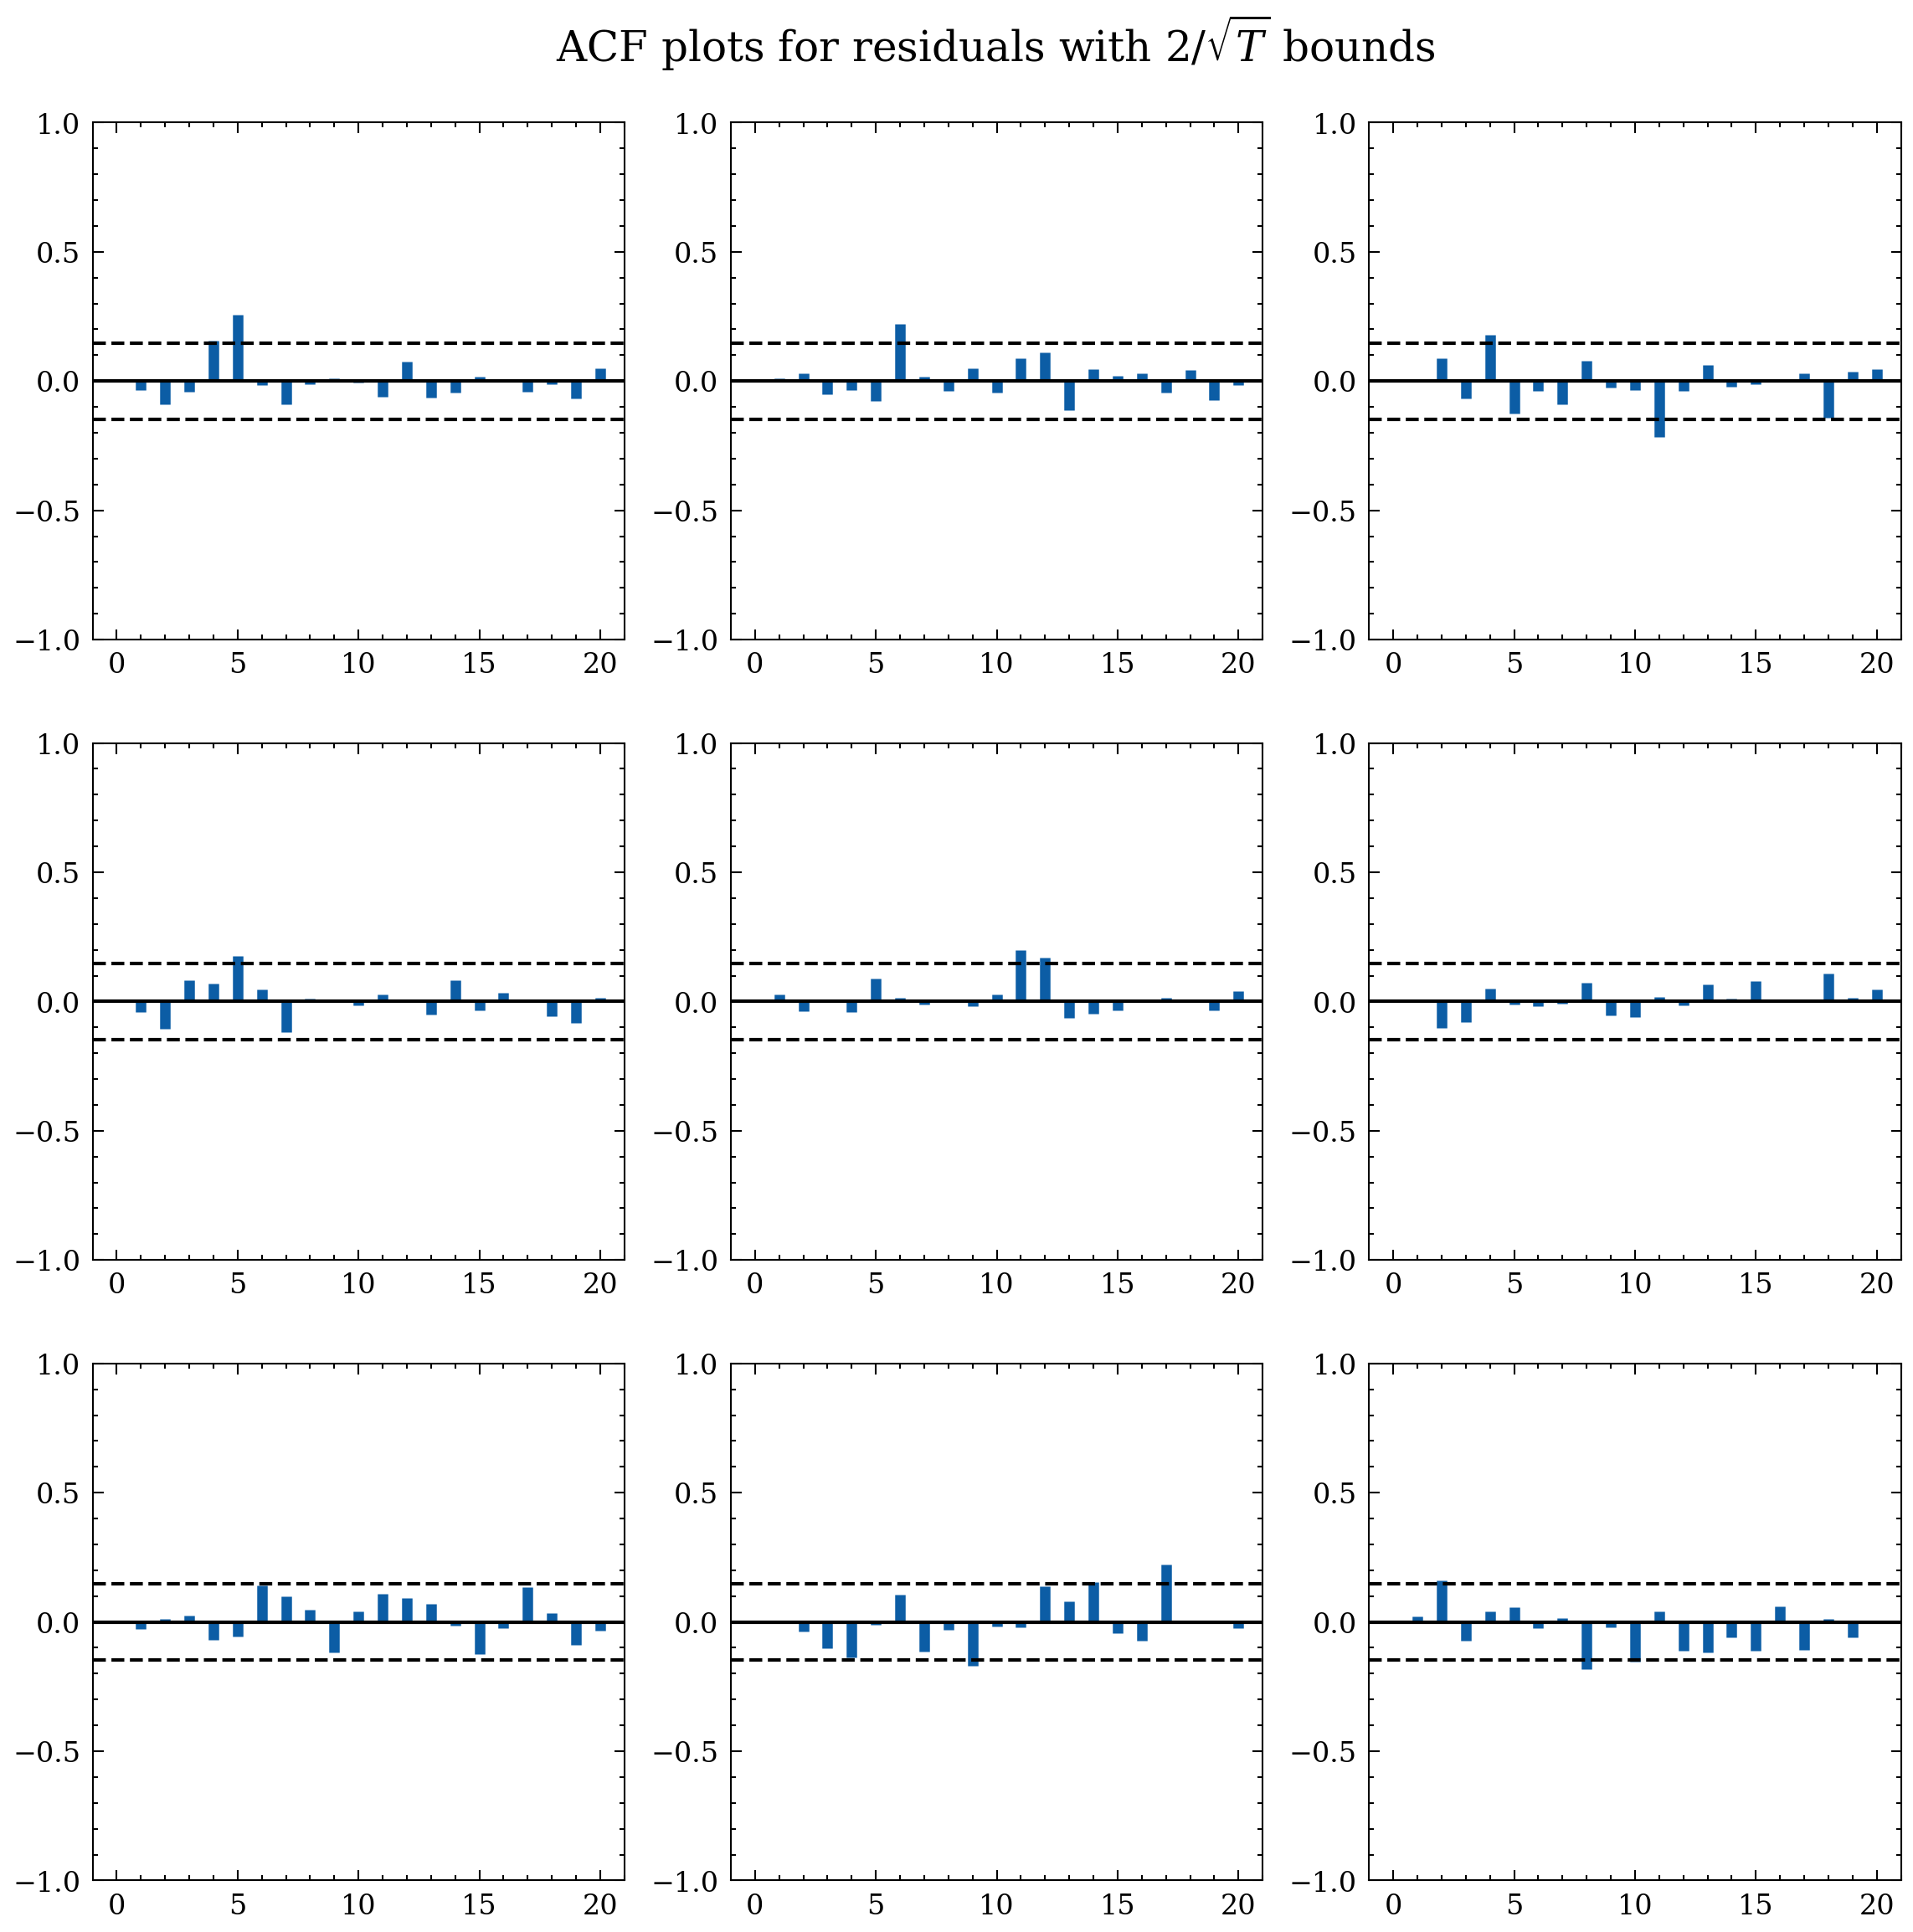

In [15]:
plt.style.use(['science','no-latex'])
results_2_plot_acorr = results_2.plot_acorr(nlags=20, resid=True, linewidth=3)
results_2_plot_acorr.set_size_inches(8, 8)
results_2_plot_acorr.set_dpi(300)
results_2_plot_acorr.savefig("acf_plots_2.pdf")

### 12.3 Plotting Results for full sample timeframe

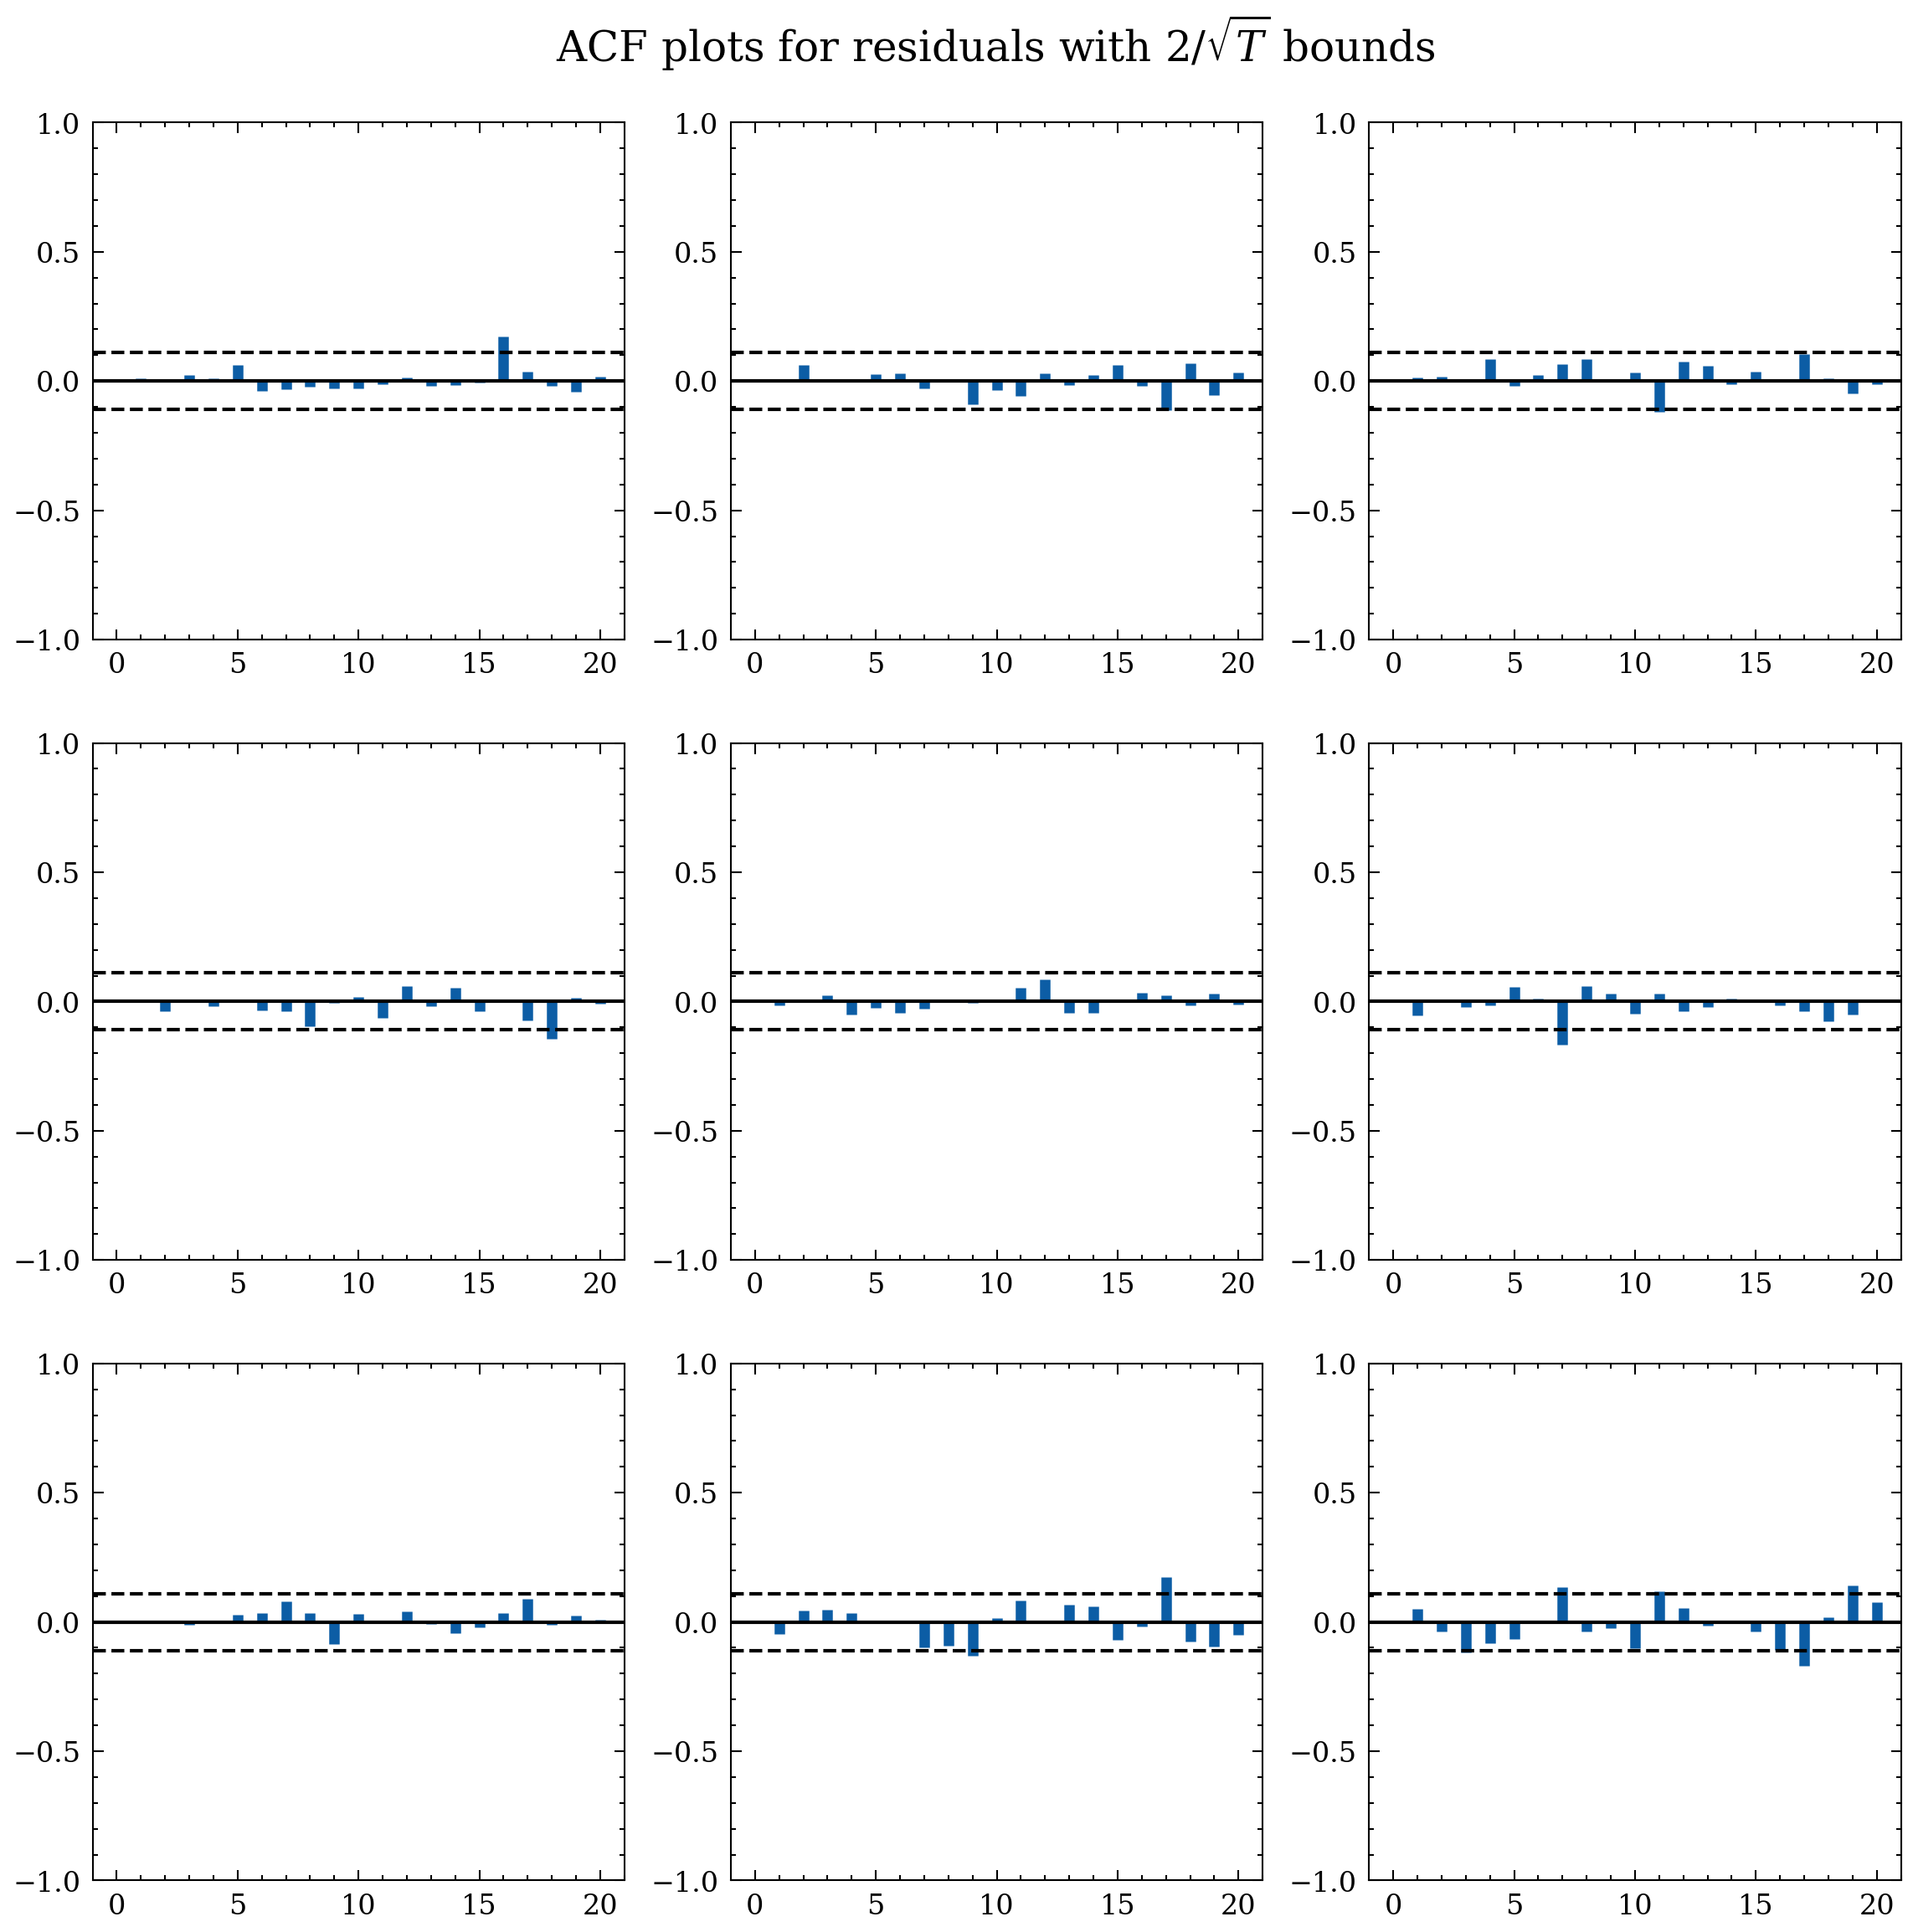

In [16]:
plt.style.use(['science','no-latex'])
results_full_plot_acorr = results_full.plot_acorr(nlags=20, resid=True, linewidth=3)
results_full_plot_acorr.set_size_inches(8, 8)
results_full_plot_acorr.set_dpi(300)
results_full_plot_acorr.savefig("acf_plots_full.pdf")

Note: Shown are self (on the diagonal) and cross correlations!

In order to remove the signiﬁcant residual autocorrelations at low lags, it may help to ﬁt a VAR(3) or VAR(4) model. Of course, this conﬂicts with choosing the model order on the basis of the model selection criteria. Thus, it has to be decided which criterion is given priority. It may be worth noting that a plot like that in Figure 4.2 may give a misleading picture of the overall signiﬁcance of the residual autocorrelations because they are not asymptotically independent.
Lütkepohl, Helmut, and Helmut Lütkepohl. New Introduction to Multiple Time Series Analysis, Springer Berlin / Heidelberg, 2007. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/unigiessen/detail.action?docID=6312046.
Created from unigiessen on 2021-09-03 09:19:40.

## 13. Impulse Response Functions (IRP)

### 13.1 IRP for first sample timeframe

In [17]:
irf_1 = results_1.irf(5)

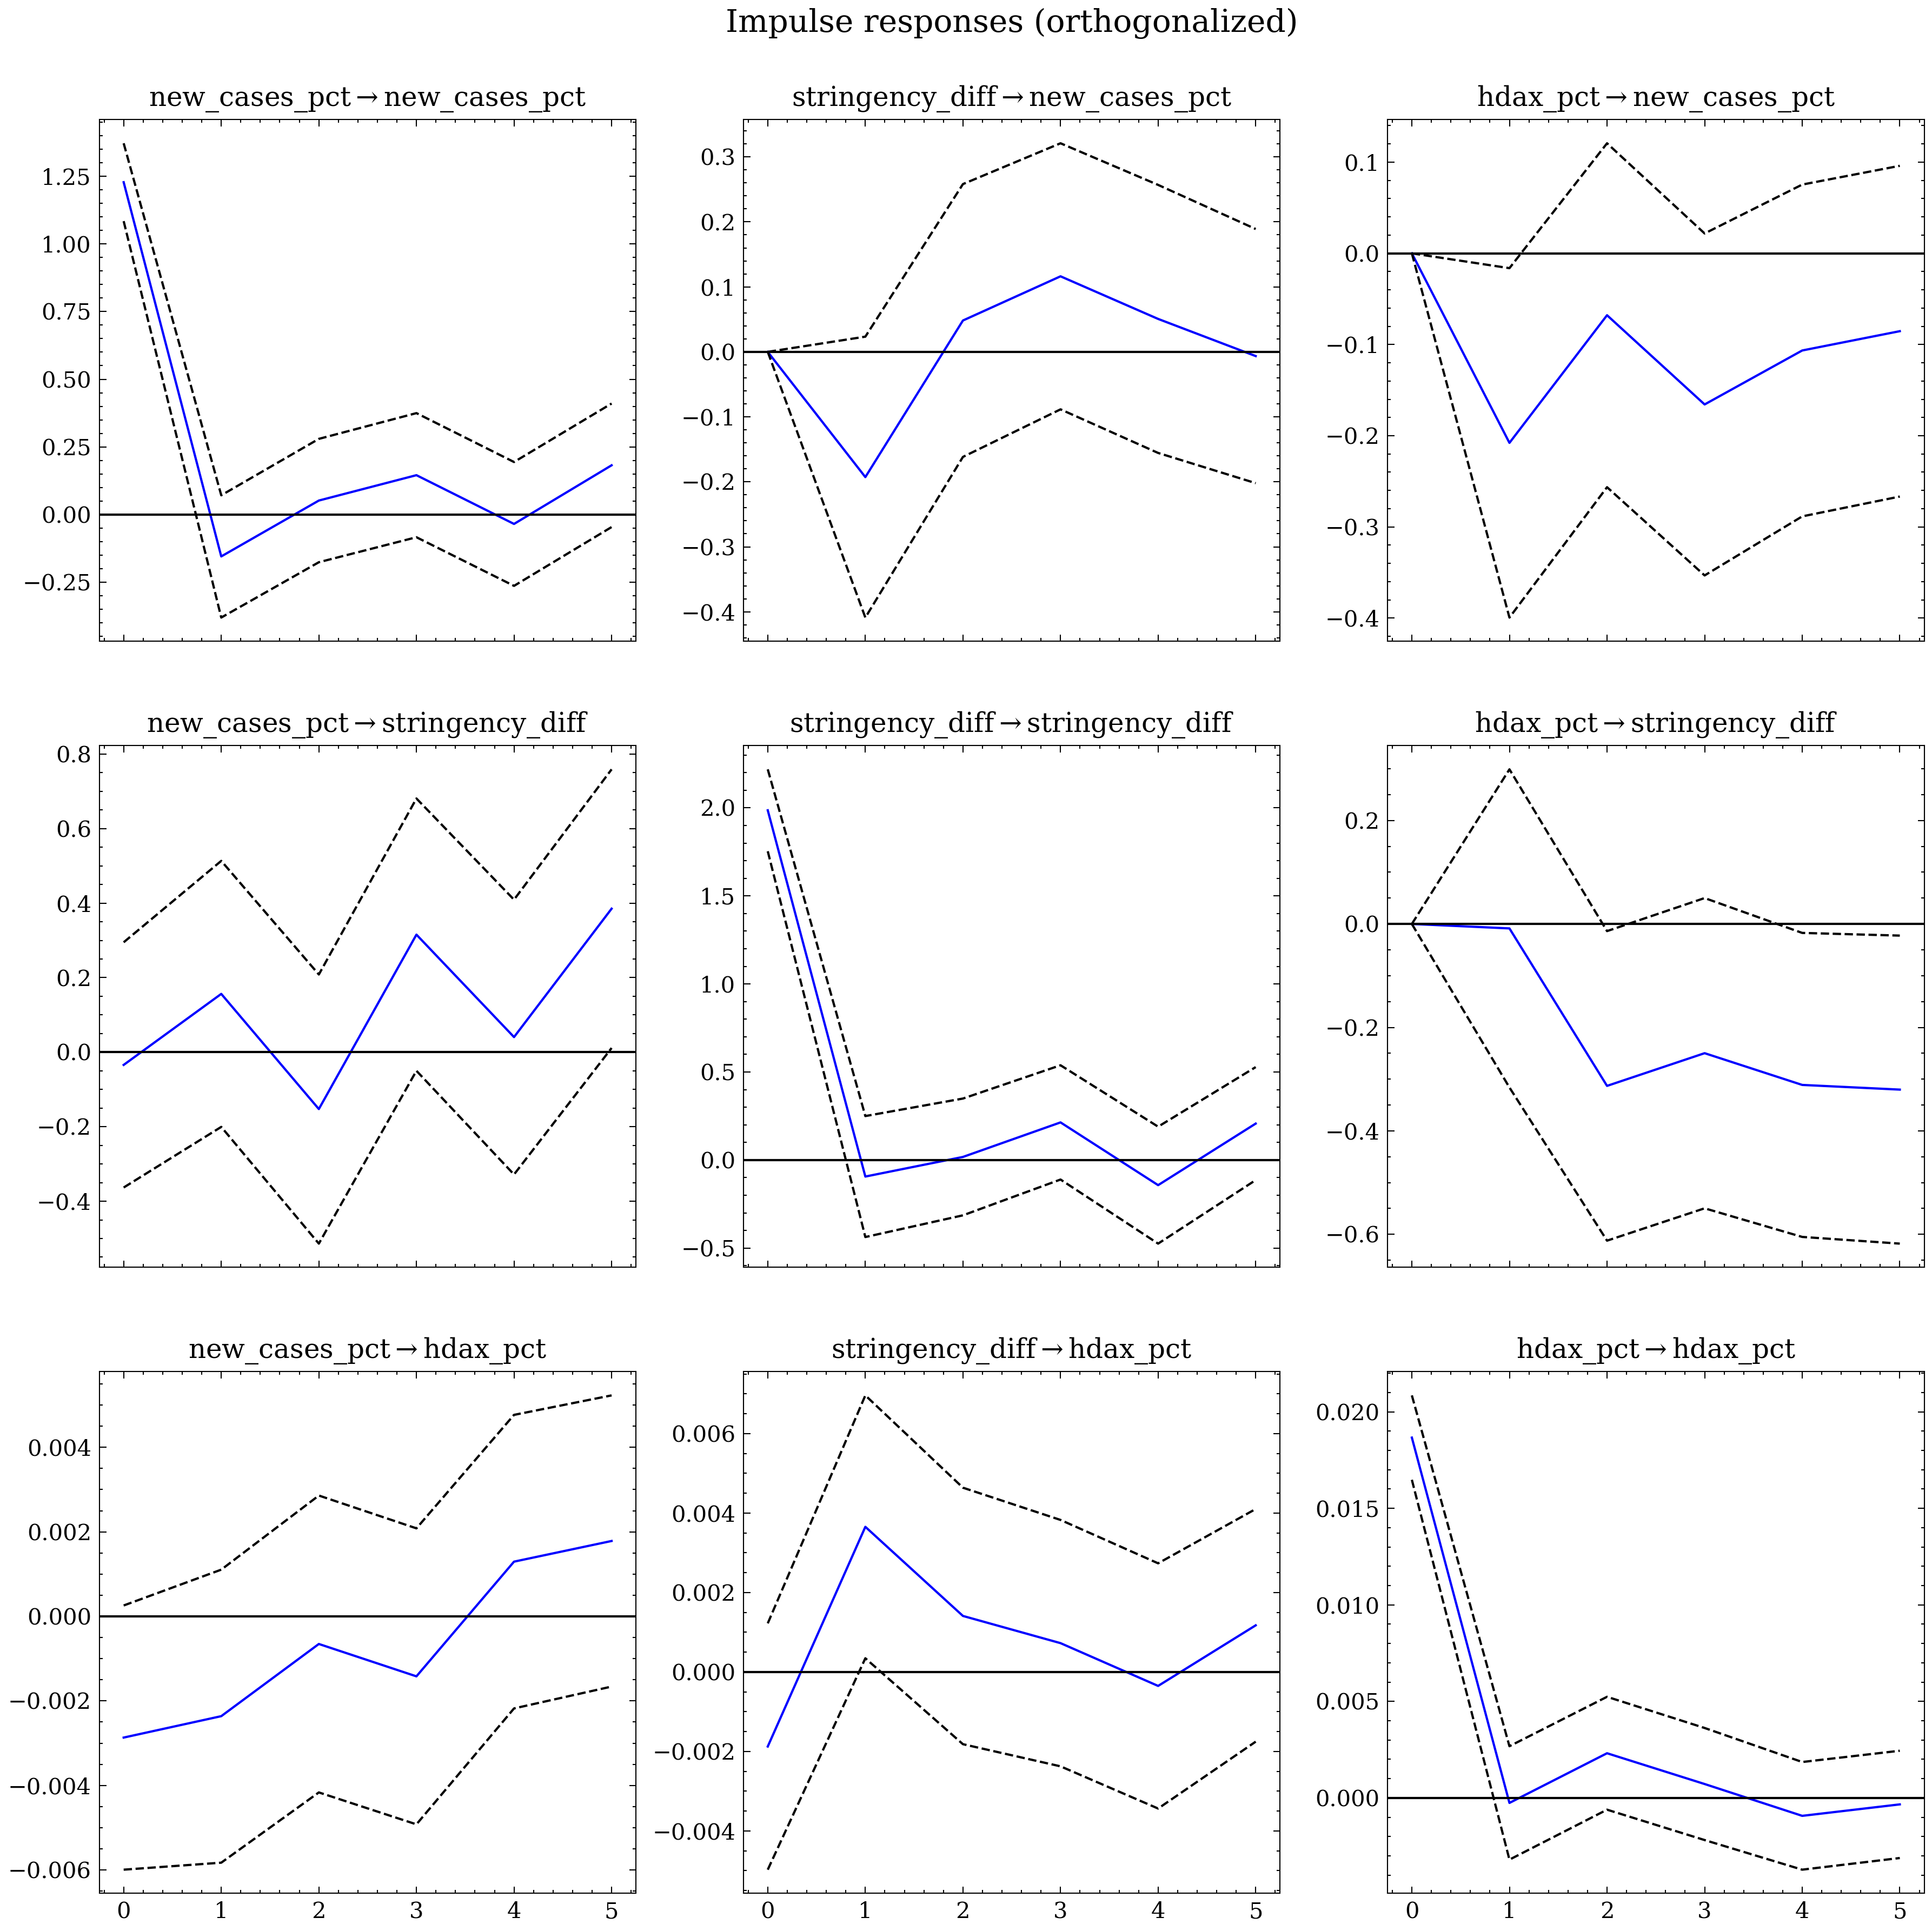

In [18]:
plt.style.use(['science','no-latex'])
irf_1_plot = irf_1.plot(orth=True)
irf_1_plot.set_size_inches(12.5, 12.5)
irf_1_plot.set_dpi(300)
irf_1_plot.savefig("irf_plots_1.pdf")

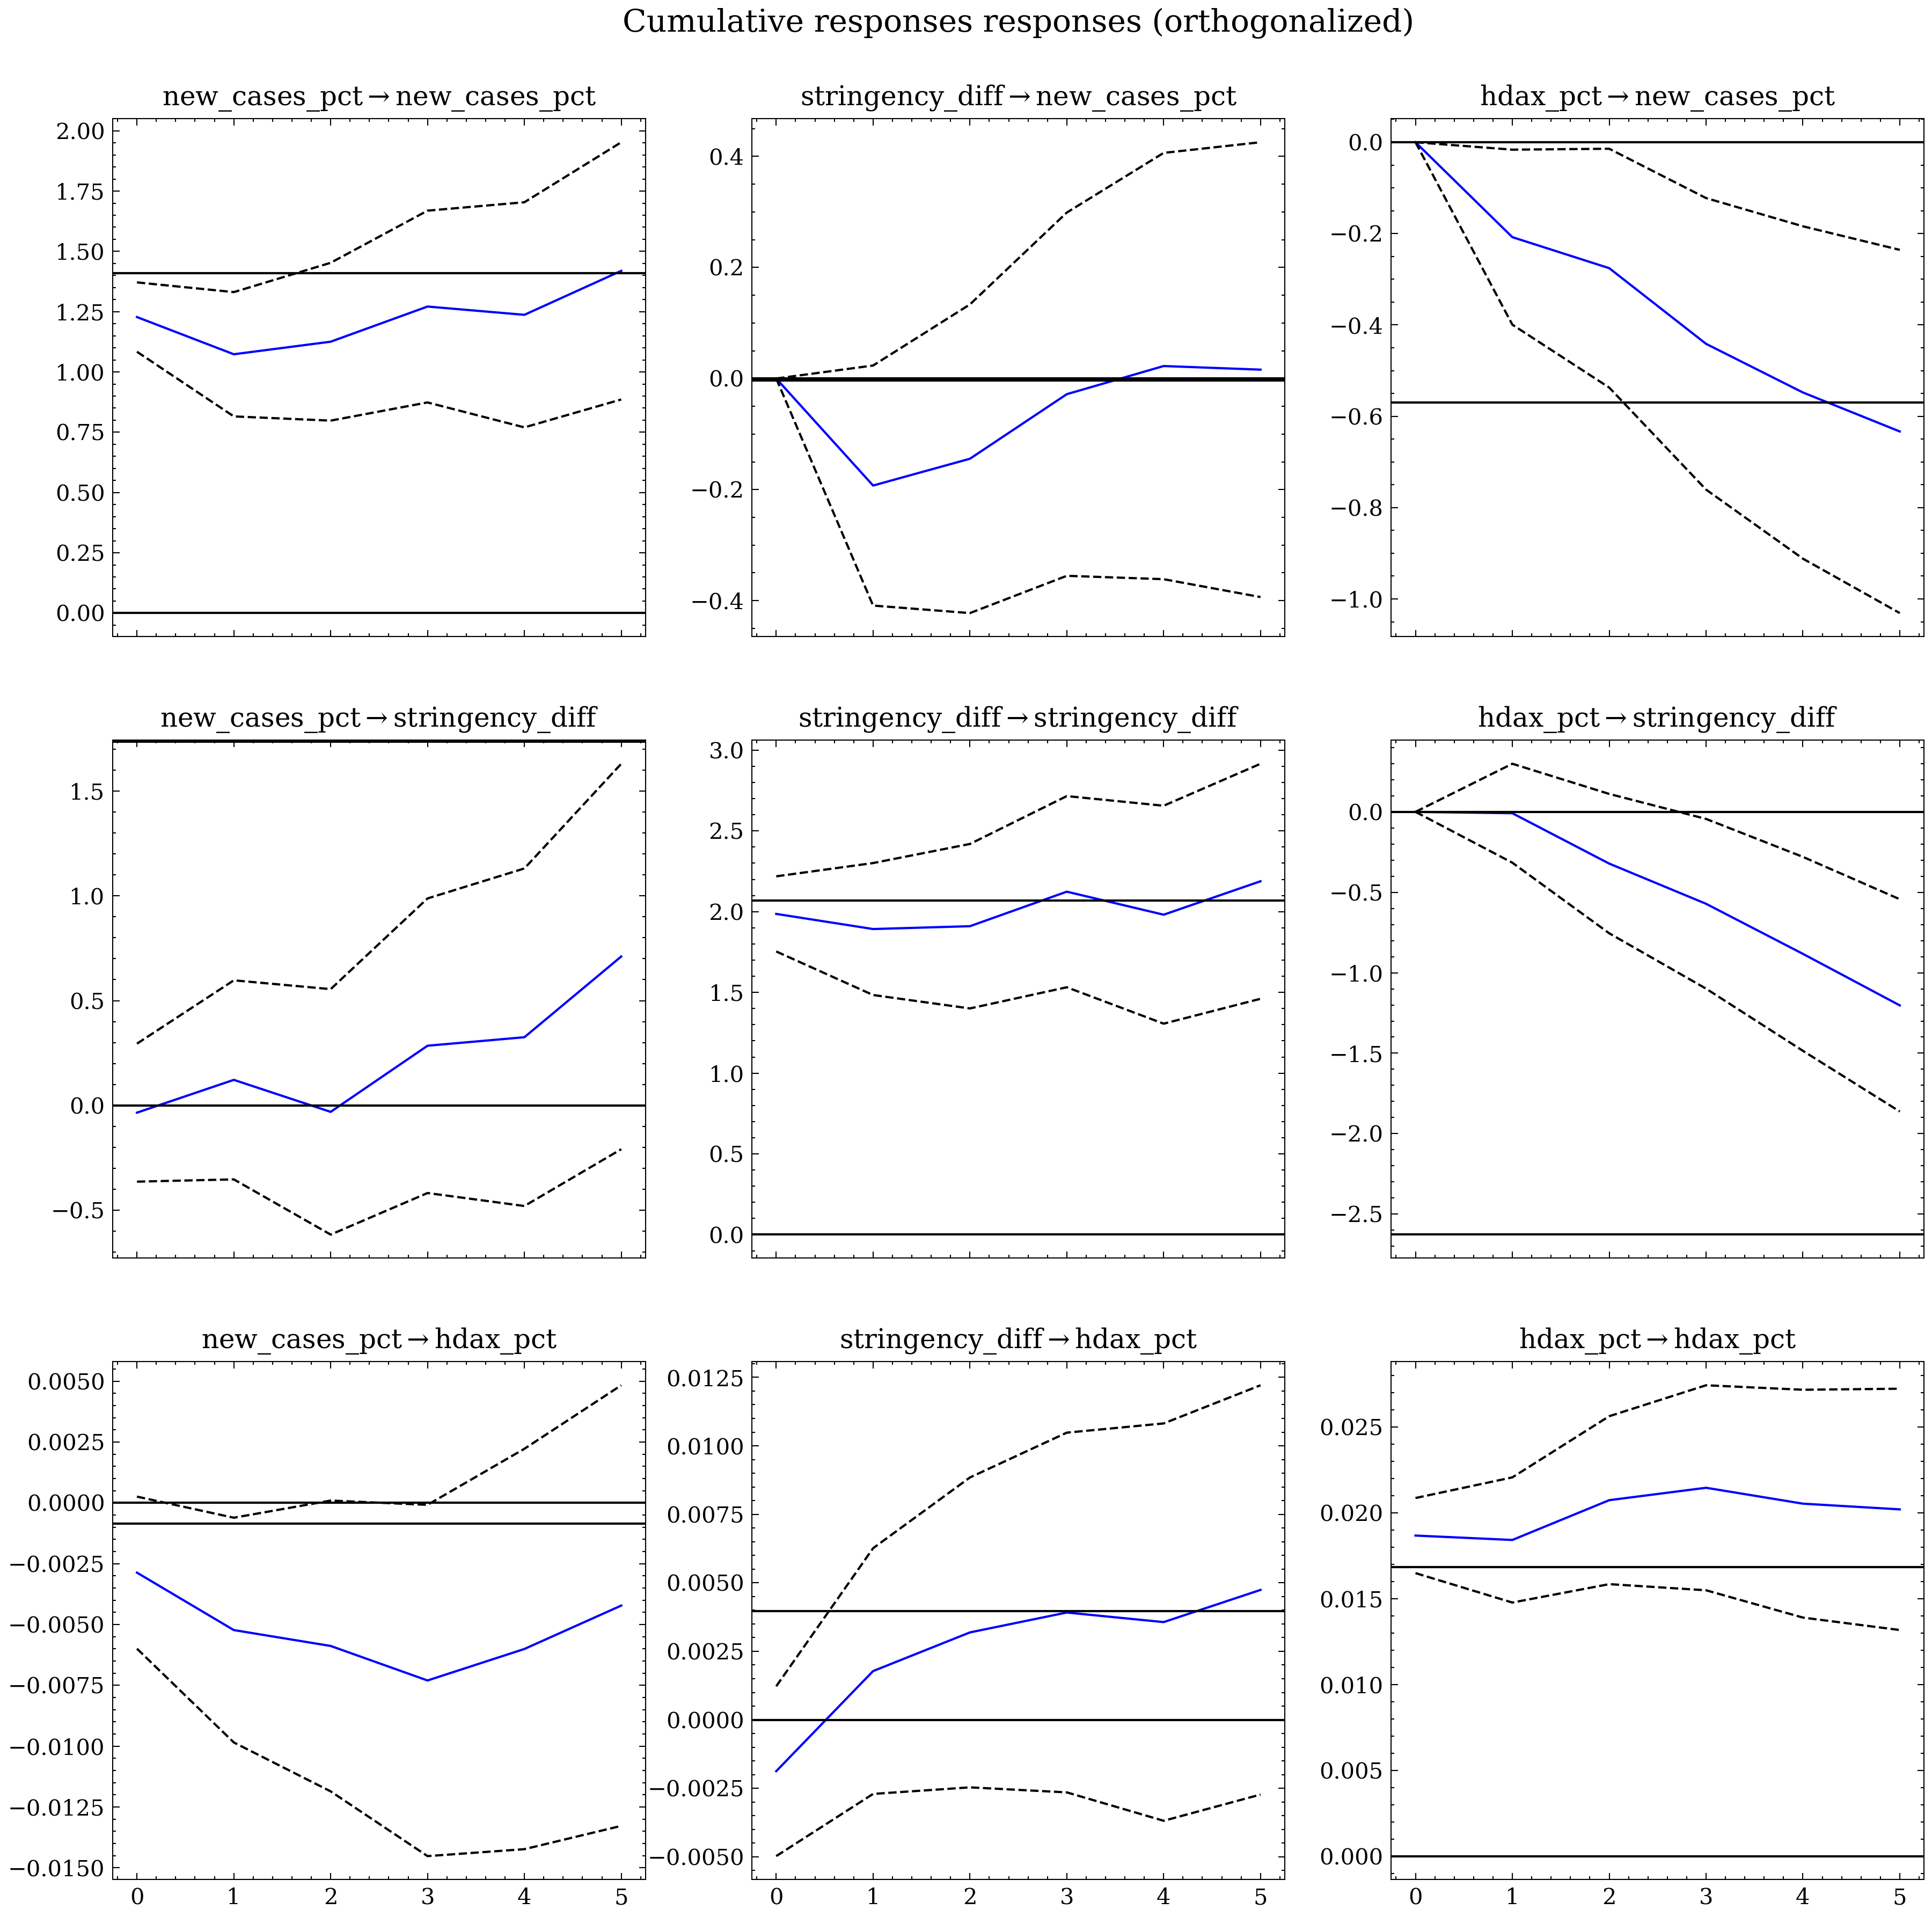

In [19]:
plt.style.use(['science','no-latex'])
irf_1_cum_plot = irf_1.plot_cum_effects(orth=True)
irf_1_cum_plot.set_size_inches(12.5, 12.5)
irf_1_cum_plot.set_dpi(300)
irf_1_cum_plot.savefig("irf_cum_plots_1.pdf")

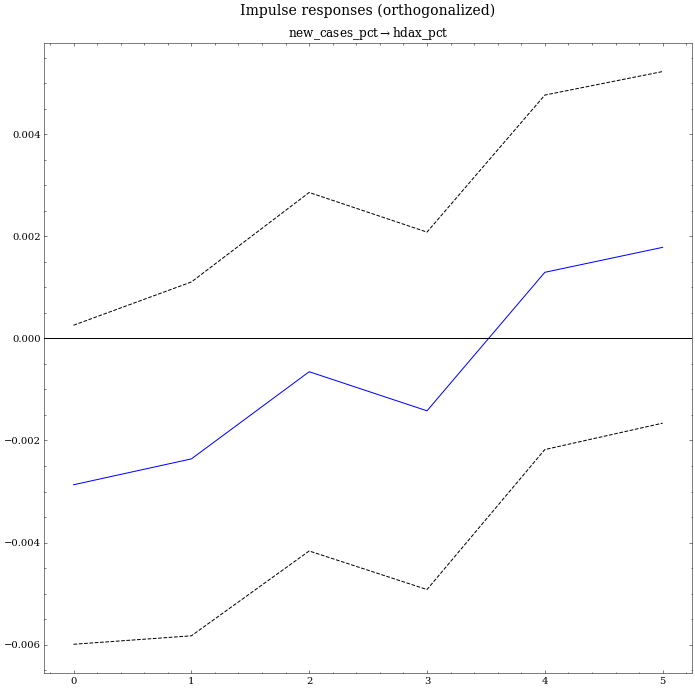

In [20]:
 irf_1_plot_new_cases = irf_1.plot(impulse='new_cases_pct',
                                   response="hdax_pct",
                                   orth=True)

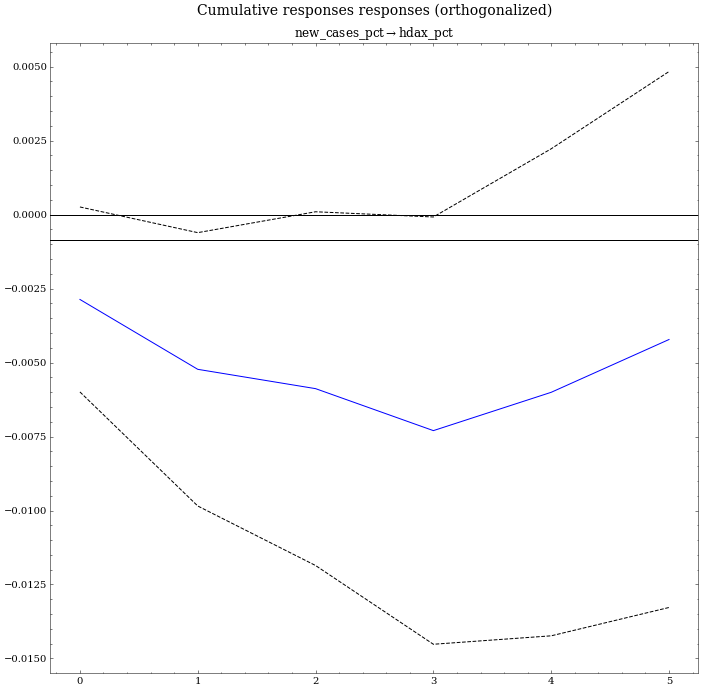

In [21]:
irf_1_plot_cumulative_cases = irf_1.plot_cum_effects(impulse='new_cases_pct',
                                                     response="hdax_pct",
                                                     orth=True)

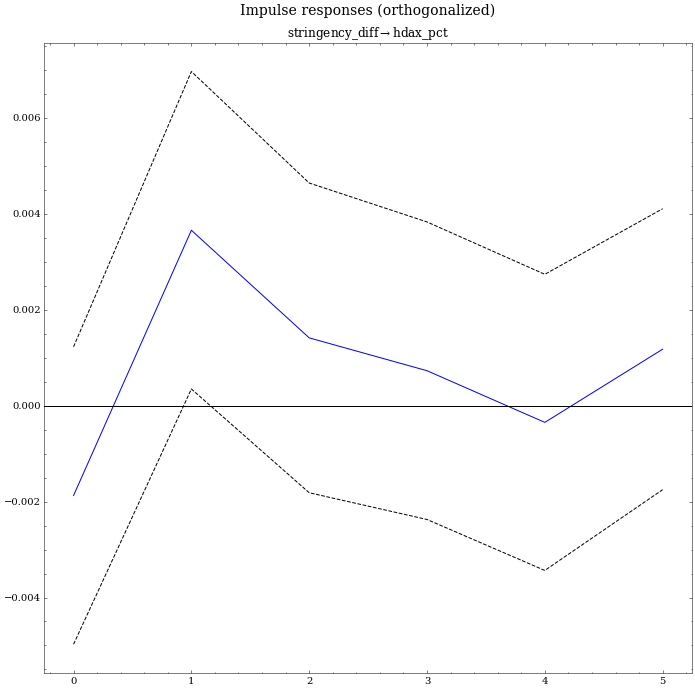

In [22]:
 irf_1_plot_stringency = irf_1.plot(impulse='stringency_diff',
                                    response="hdax_pct",
                                    orth=True)

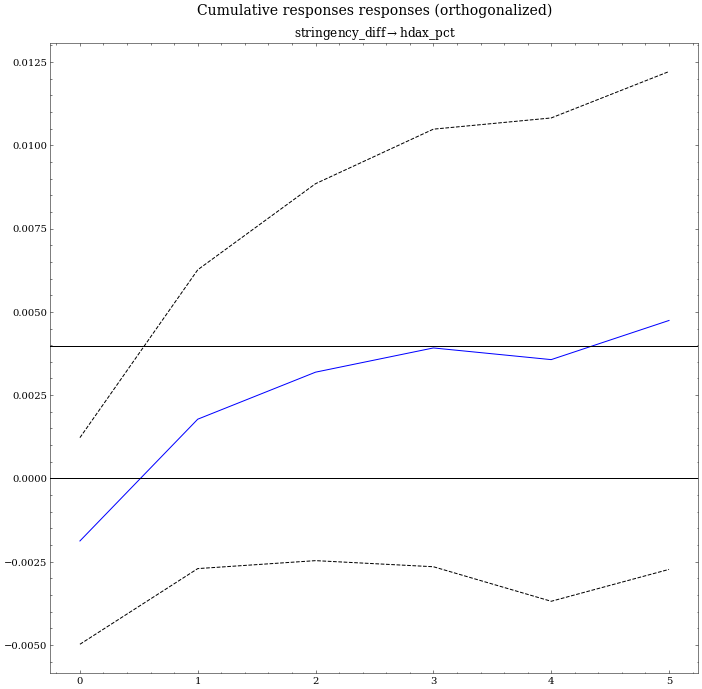

In [23]:
irf_1_plot_cumulative_stringency = irf_1.plot_cum_effects(impulse='stringency_diff',
                                                          response="hdax_pct",
                                                          orth=True)

### 13.2 IRP for second sample timeframe

In [24]:
irf_2 = results_2.irf(5)

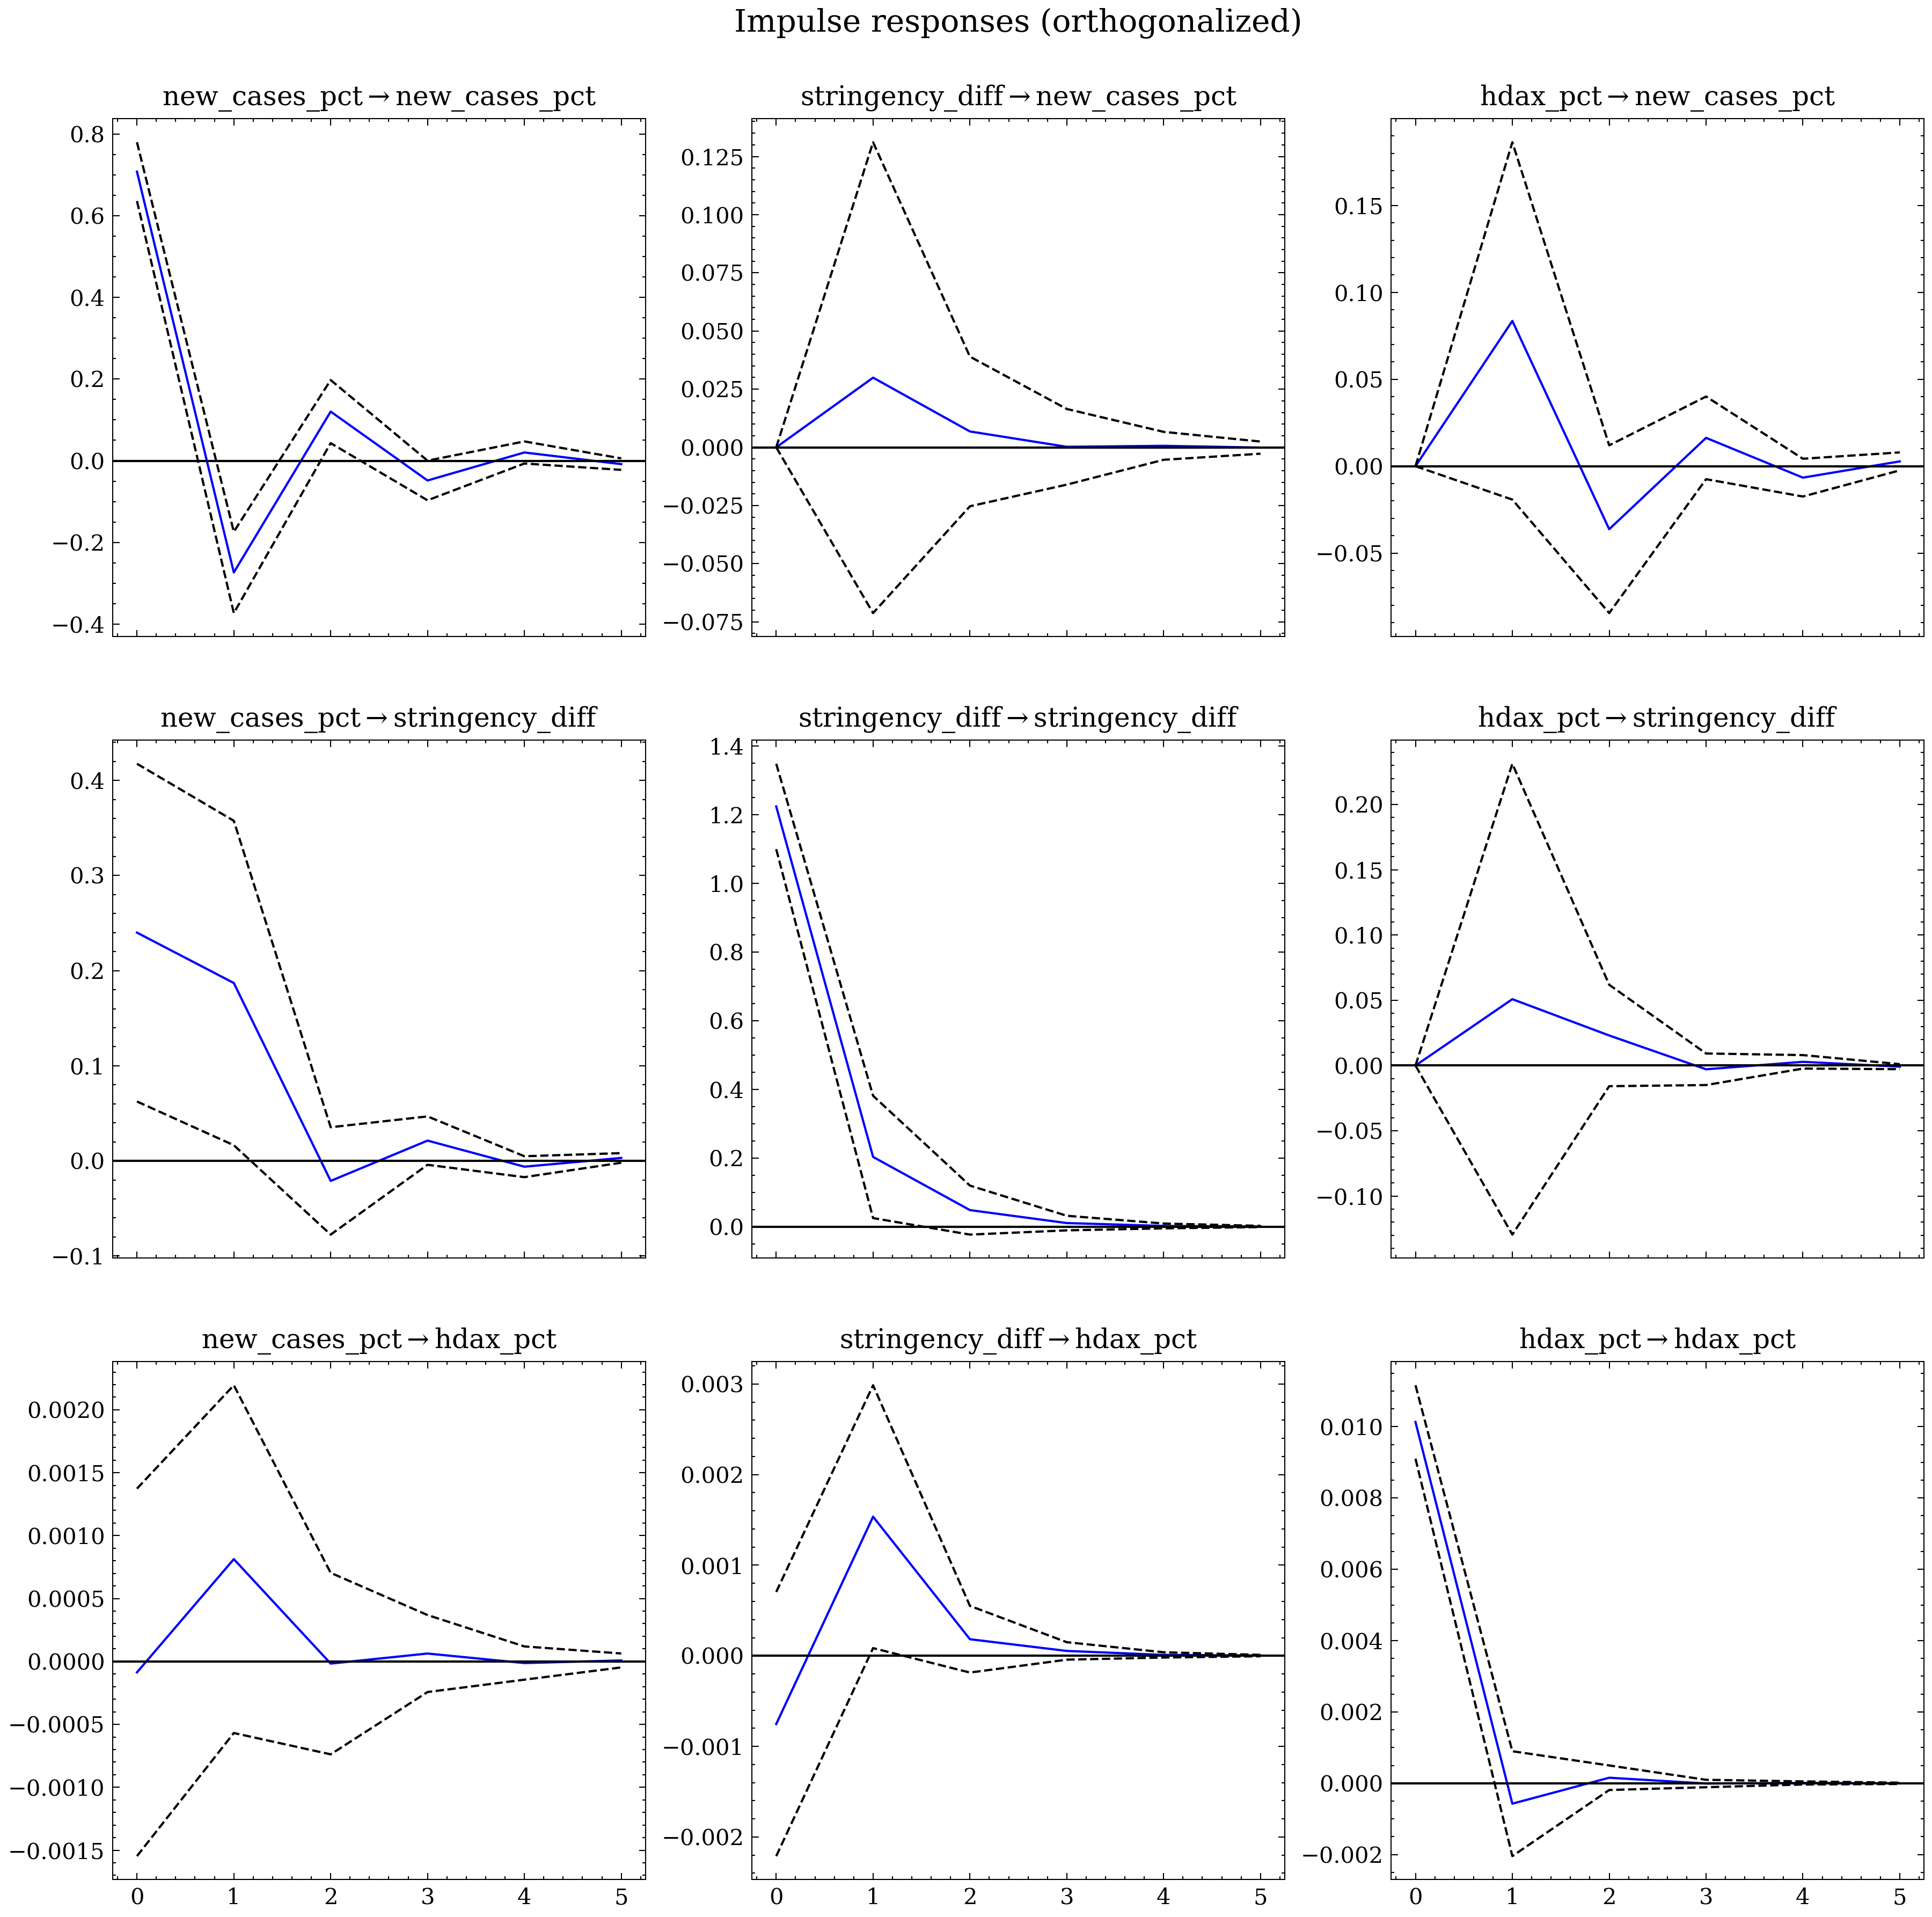

In [25]:
plt.style.use(['science','no-latex'])
irf_2_plot = irf_2.plot(orth=True)
irf_2_plot.set_size_inches(12.5, 12.5)
irf_2_plot.set_dpi(300)
irf_2_plot.savefig("irf_plots_2.pdf")

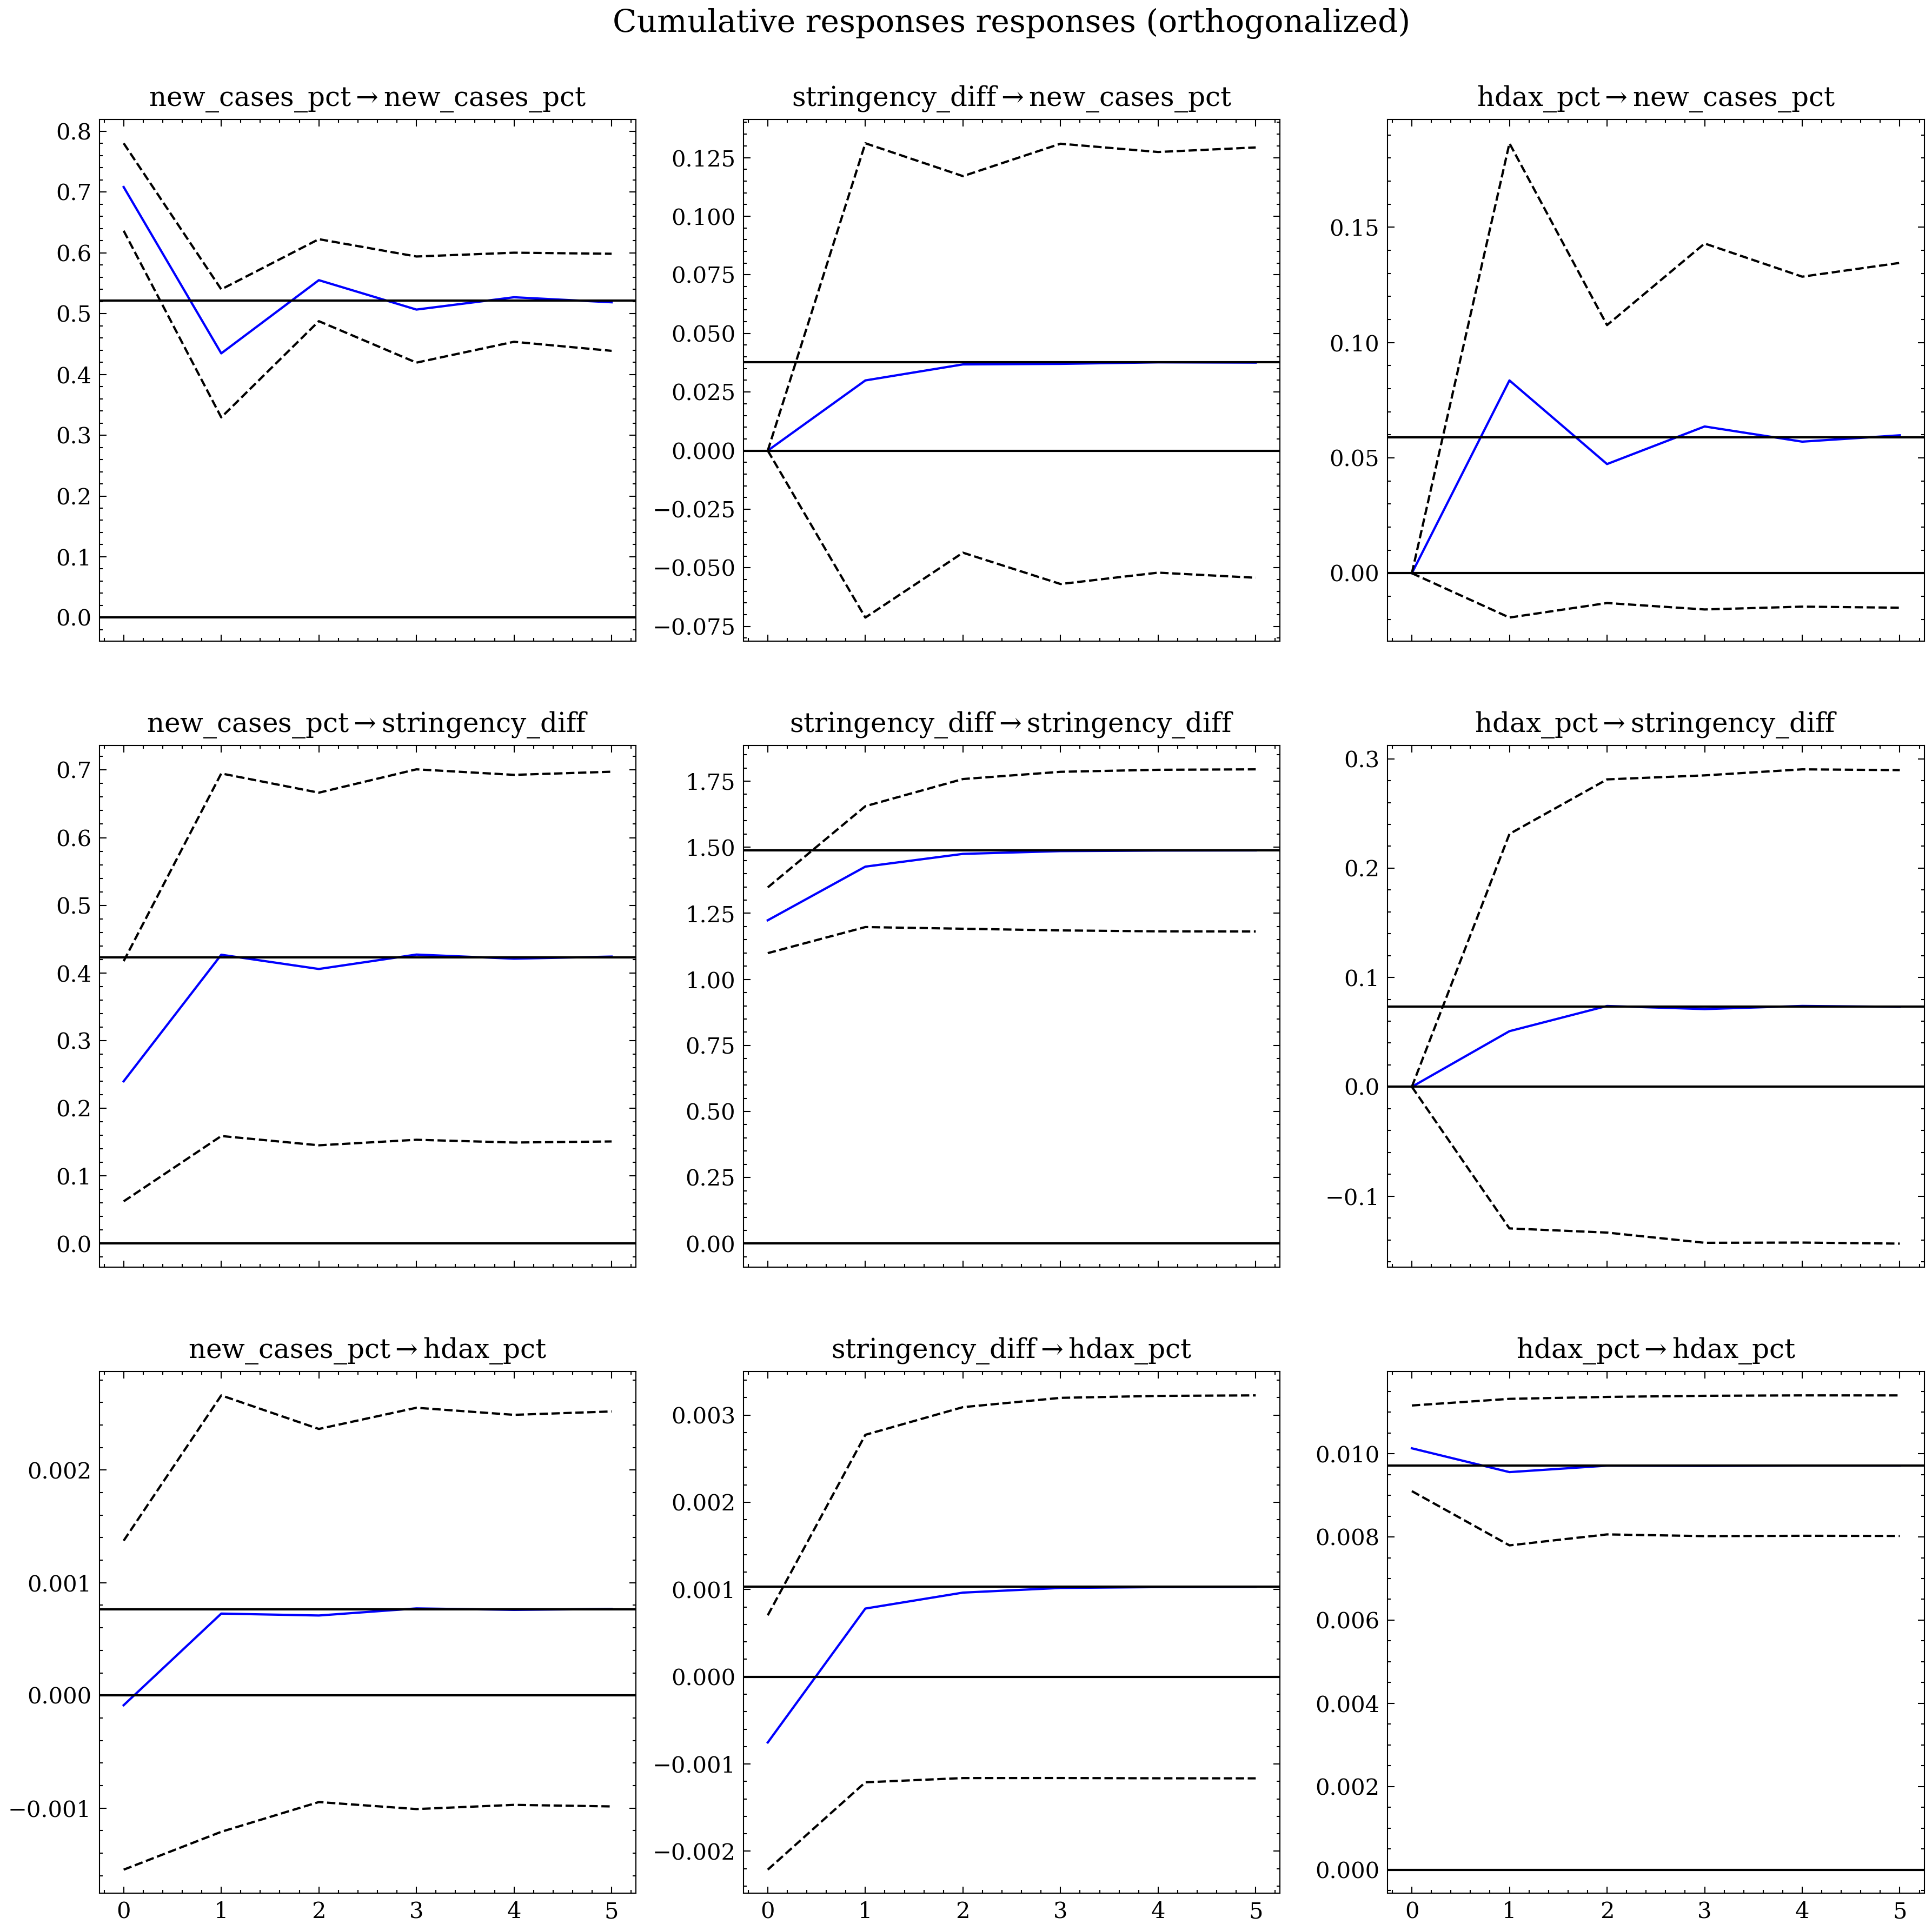

In [26]:
plt.style.use(['science','no-latex'])
irf_2_cum_plot = irf_2.plot_cum_effects(orth=True)
irf_2_cum_plot.set_size_inches(12.5, 12.5)
irf_2_cum_plot.set_dpi(300)
irf_2_cum_plot.savefig("irf_cum_plots_2.pdf")

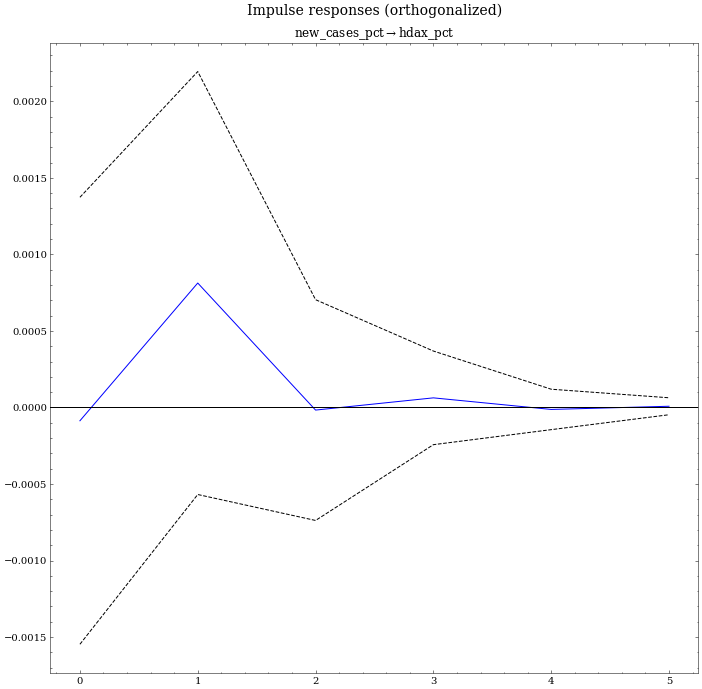

In [27]:
irf_2_plot_cases = irf_2.plot(impulse='new_cases_pct',
                                  response="hdax_pct",
                                  orth=True)

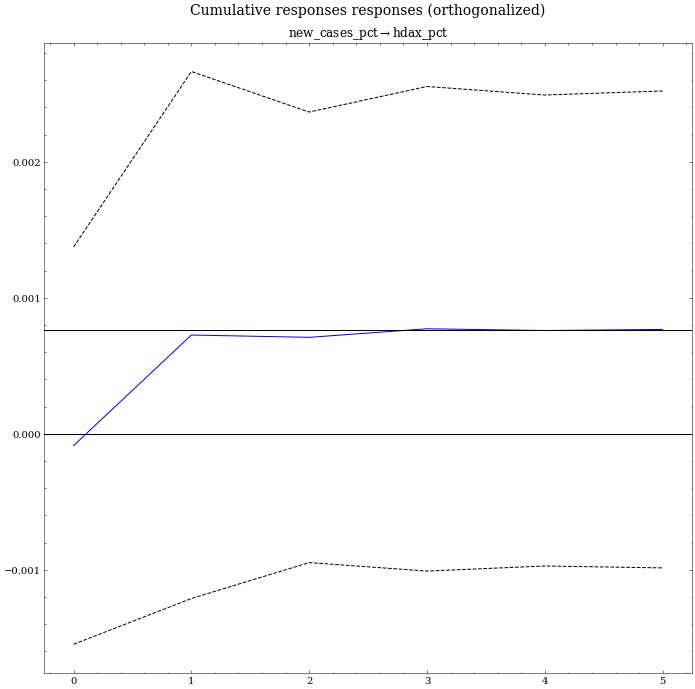

In [28]:
irf_2_plot_cumulative_cases = irf_2.plot_cum_effects(impulse='new_cases_pct', 
                                                     response="hdax_pct",
                                                     orth=True)

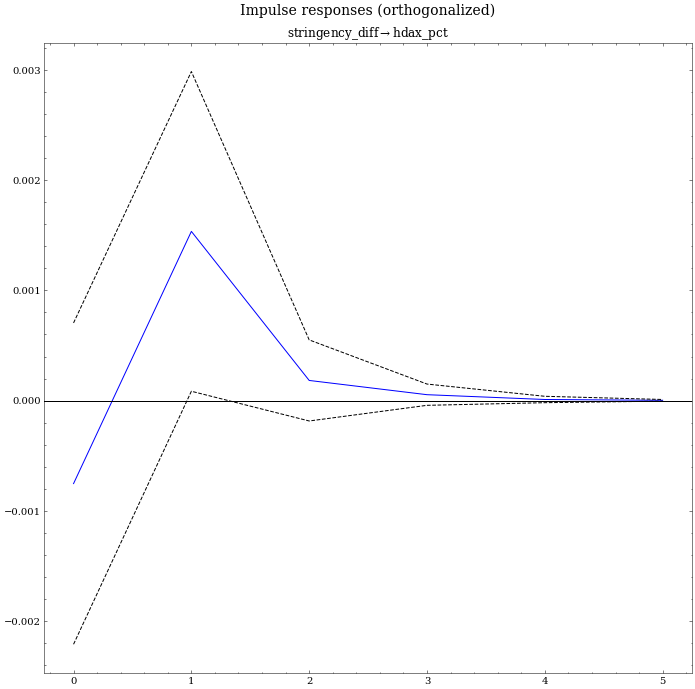

In [29]:
irf_2_plot_stringency = irf_2.plot(impulse='stringency_diff',
                                   response="hdax_pct",
                                   orth=True)

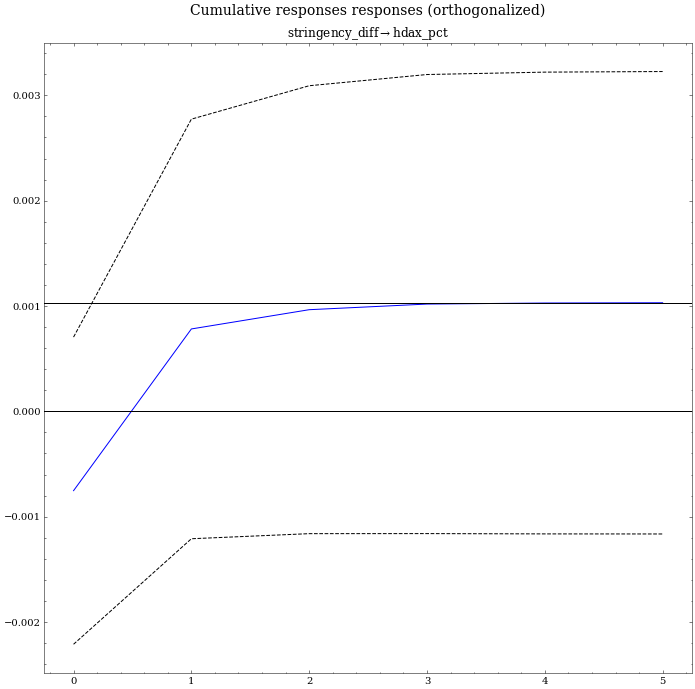

In [30]:
irf_2_plot_cumulative_stringency = irf_2.plot_cum_effects(impulse='stringency_diff', 
                                                     response="hdax_pct",
                                                     orth=True)

### 13.3 IRP for full sample timeframe

In [31]:
irf_full = results_full.irf(5)

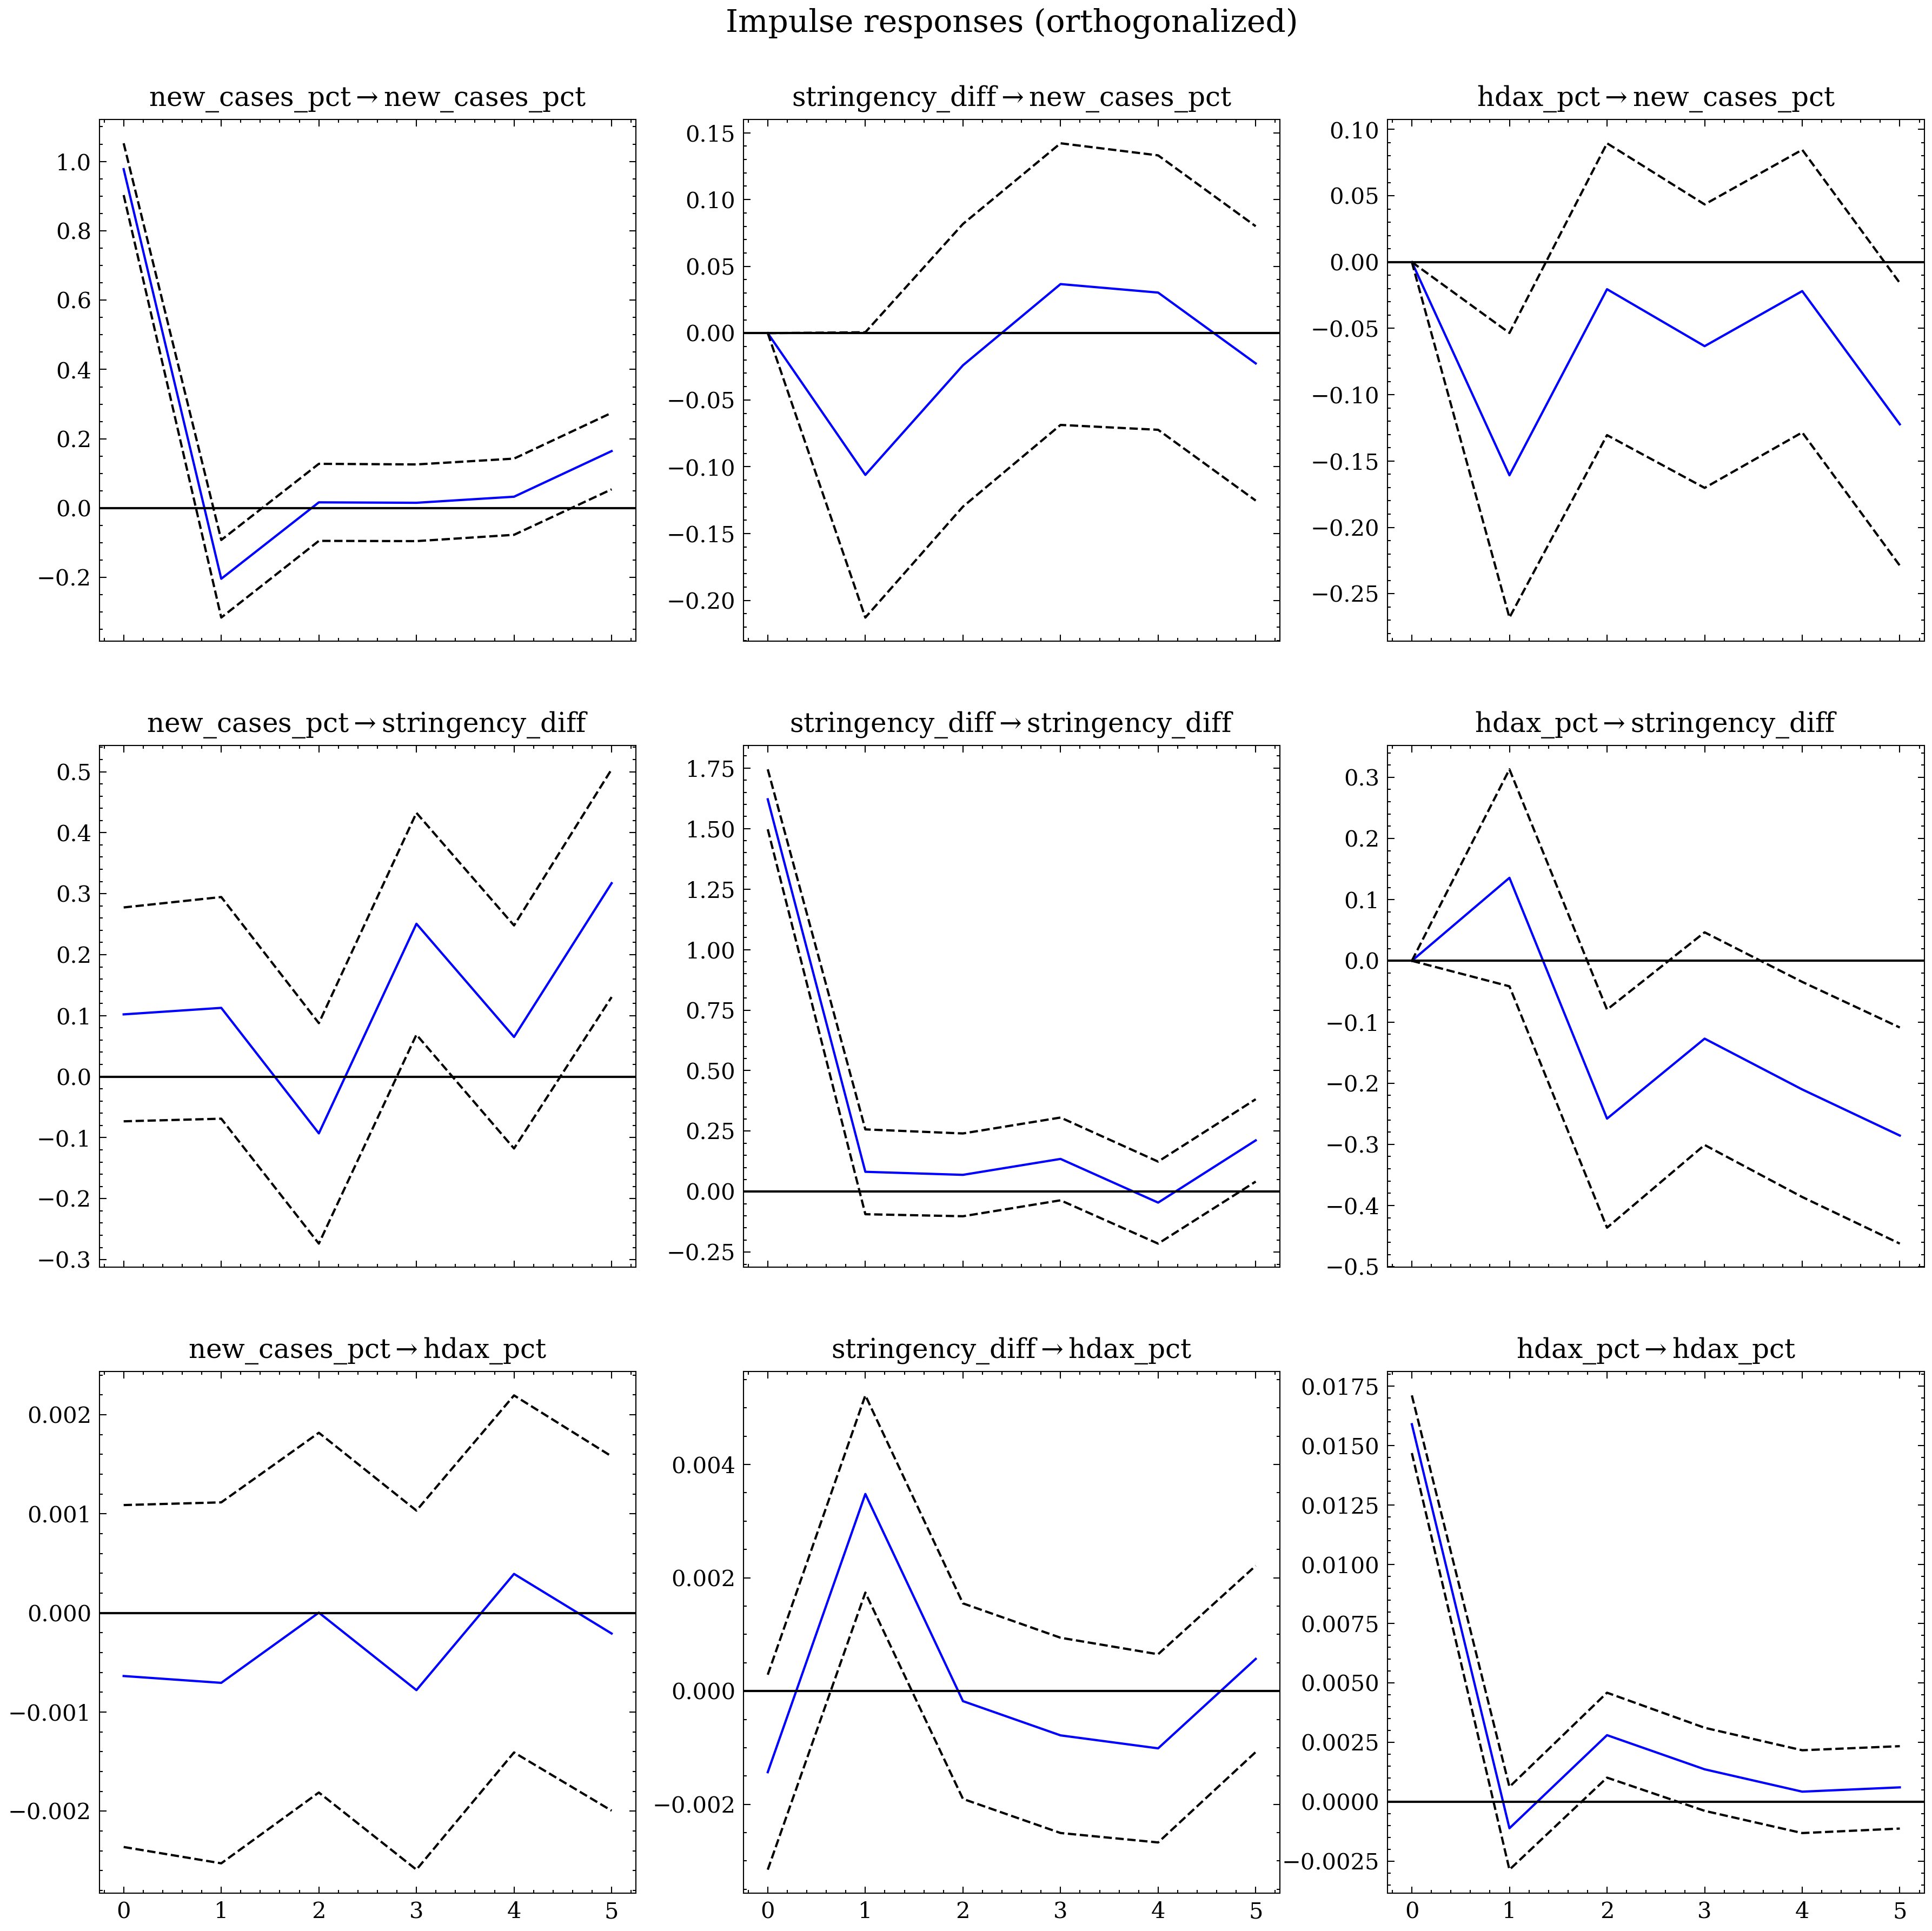

In [32]:
plt.style.use(['science','no-latex'])
irf_full_plot = irf_full.plot(orth=True)
irf_full_plot.set_size_inches(12.5, 12.5)
irf_full_plot.set_dpi(300)
irf_full_plot.savefig("irf_plots_full.pdf")

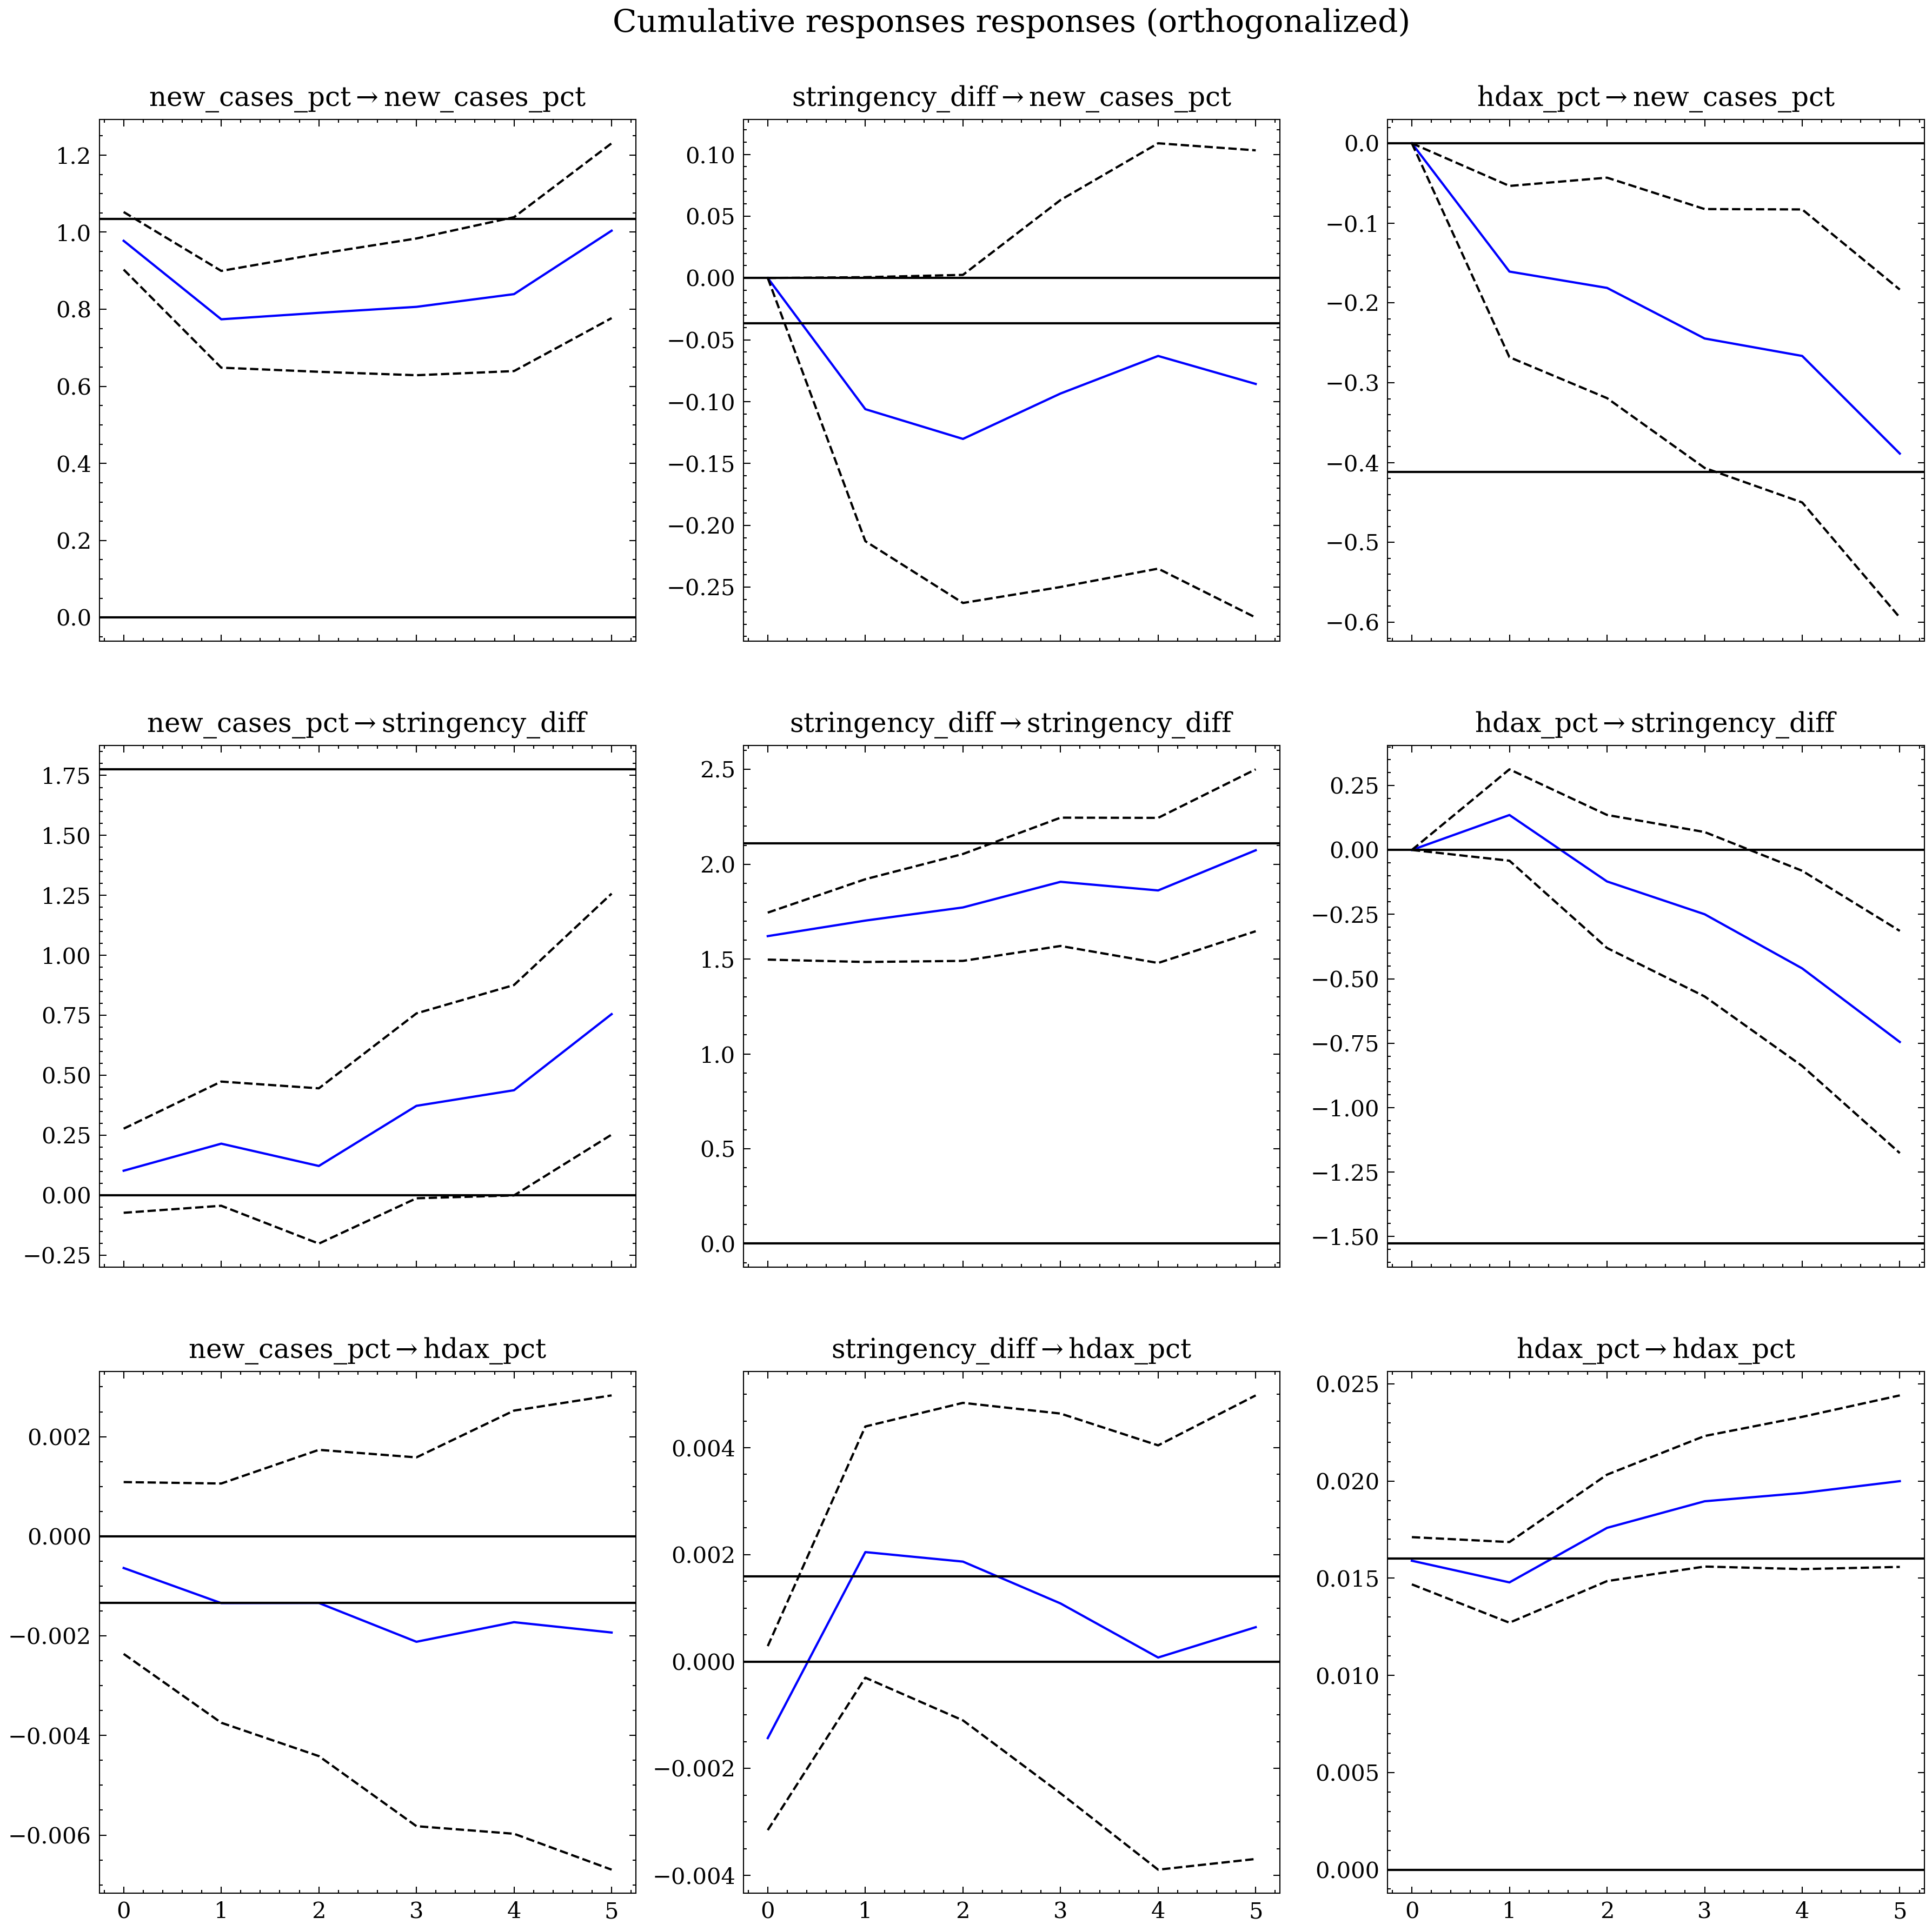

In [33]:
plt.style.use(['science','no-latex'])
irf_full_cum_plot = irf_full.plot_cum_effects(orth=True)
irf_full_cum_plot.set_size_inches(12.5, 12.5)
irf_full_cum_plot.set_dpi(300)
irf_full_cum_plot.savefig("irf_cum_plots_full.pdf")

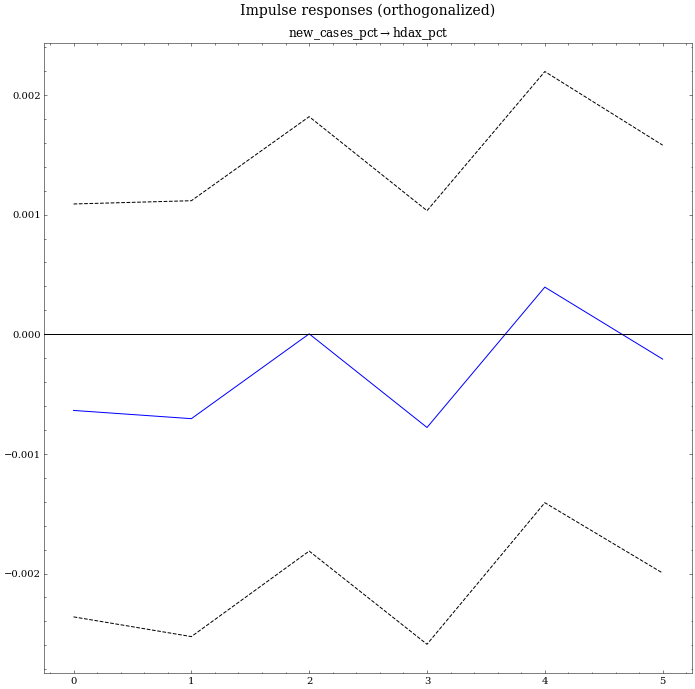

In [34]:
plt.style.use(['science','no-latex'])
irf_full_plot_cases = irf_full.plot(impulse='new_cases_pct',
                                        response="hdax_pct",
                                        orth=True)

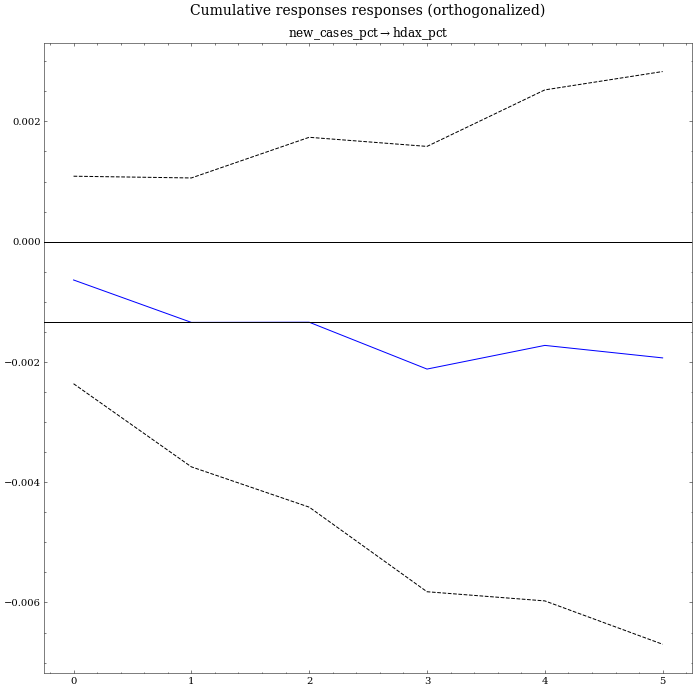

In [35]:
irf_full_plot_cumulative_cases = irf_full.plot_cum_effects(impulse='new_cases_pct',
                                                     response="hdax_pct",
                                                     orth=True)

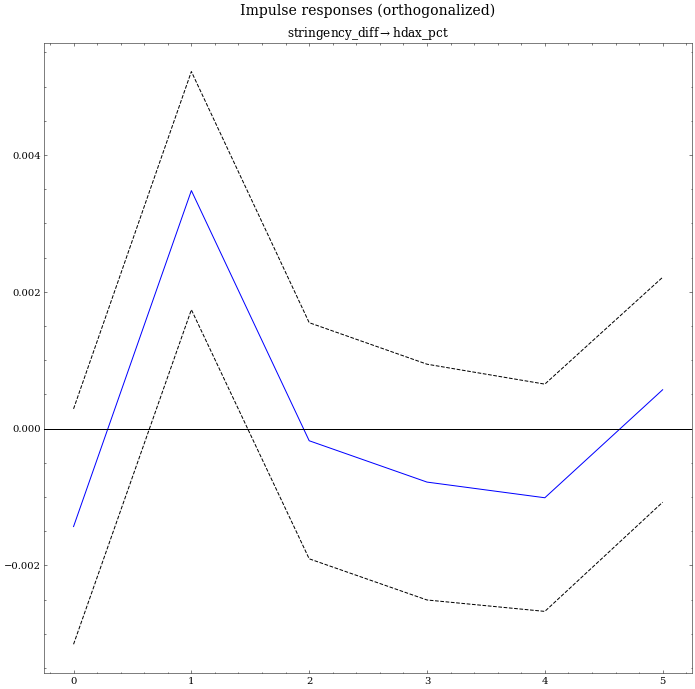

In [36]:
irf_full_plot_stringency = irf_full.plot(impulse='stringency_diff',
                                        response="hdax_pct",
                                        orth=True)

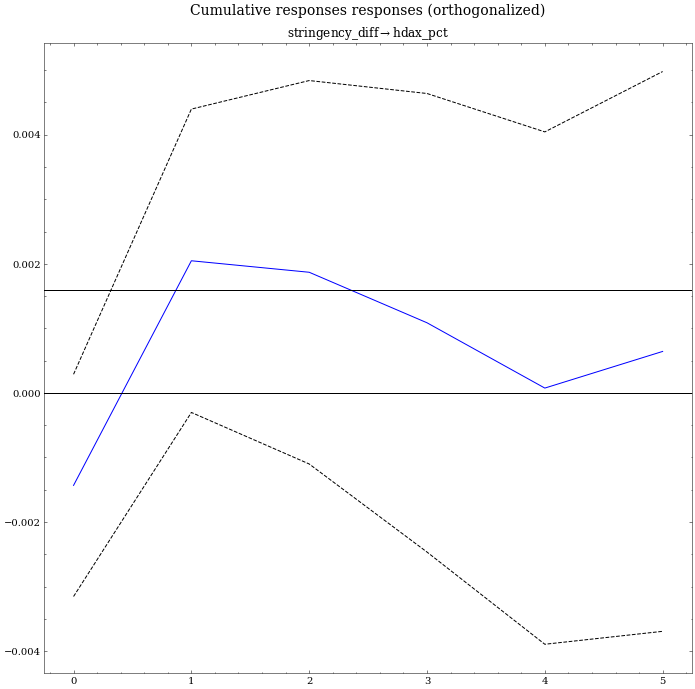

In [37]:
irf_full_plot_cumulative_stringency = irf_full.plot_cum_effects(impulse='stringency_diff',
                                                                response="hdax_pct",
                                                                orth=True)

## 14. Statistical Tests

### 14.1 Granger Causality Tests

* H0: “the causing variables do not Granger-cause the remaining variables of the system”
* H1: “the causing variables is Granger-causal for the remaining variables”

### 14.1.1 Granger Causality tests for first sample

In [38]:
#Testing block exogenity of new cases and stringency on stock returns
causality_1_block = results_1.test_causality('hdax_pct', ['new_cases_pct', 'stringency_diff'], kind='f', signif=0.05)

#Testing granger causality of cases on stock returns
causality_1_cases = results_1.test_causality('hdax_pct', 'new_cases_pct', kind='wald', signif=0.05)

#Testing granger causality of stringency on stock returns
causality_1_stringency = results_1.test_causality('hdax_pct', 'stringency_diff', kind='wald', signif=0.05)

In [39]:
causality_1_block.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [40]:
causality_1_cases.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [41]:
causality_1_stringency.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### 14.1.2 Granger Causality tests for second sample

In [42]:
#Testing block exogenity of new cases and stringency on stock returns
causality_2_block = results_2.test_causality('hdax_pct', ['new_cases_pct', 'stringency_diff'], kind='f', signif=0.05)

#Testing granger causality of cases on stock returns
causality_2_cases = results_2.test_causality('hdax_pct', 'new_cases_pct', kind='wald', signif=0.05)

#Testing granger causality of stringency on stock returns
causality_2_stringency = results_2.test_causality('hdax_pct', 'stringency_diff', kind='wald', signif=0.05)

In [43]:
causality_2_block.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [44]:
causality_2_cases.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [45]:
causality_2_stringency.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### 14.1.3 Granger Causality tests for full sample

In [46]:
#Testing block exogenity of new cases and stringency on stock returns
causality_full_block = results_full.test_causality('hdax_pct', ['new_cases_pct', 'stringency_diff'], kind='f', signif=0.05)

#Testing granger causality of cases on stock returns
causality_full_cases = results_full.test_causality('hdax_pct', 'new_cases_pct', kind='wald', signif=0.05)

#Testing granger causality of stringency on stock returns
causality_full_stringency = results_full.test_causality('hdax_pct', 'stringency_diff', kind='wald', signif=0.05)

In [47]:
causality_full_block.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [48]:
causality_full_cases.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [49]:
causality_full_stringency.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### 14.2 Normality Tests

* H0: “The standardized residuals follow a normal distribution”
* H1: “The standardized residuals do not follow a normal distribution”

In [50]:
#Testing normality of first sample
normality_1 = results_1.test_normality()

#Testing normality of second sample
normality_2 = results_2.test_normality()

#Testing normality of full sample
normality_full = results_full.test_normality()

In [51]:
normality_1.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [52]:
normality_2.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [53]:
normality_full.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### 14.3 Residual Autocorrelation Tests

Note: 

We use the Portmanteau test with reasonably large number of lags to test for the overall signiﬁcance of the residual autocorrelations up to lag h. "For practical purposes, it is important to remember that the χ 2 - approximation to the distribution of the test statistic may be misleading for small values of h ." and "For large h, the degrees of freedom in the auxiliary regression model will be exhausted". See Lütkepohl:
In contrast to the portmanteau tests which should be used for reasonably large h only, the LM tests are more suitable for small values of h . For large h , the degrees of freedom in the auxiliary regression model will be exhausted
Lütkepohl, Helmut, and Helmut Lütkepohl. New Introduction to Multiple Time Series Analysis, Springer Berlin / Heidelberg, 2007. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/unigiessen/detail.action?docID=6312046.
Created from unigiessen on 2021-09-03 08:45:14.

However: (Verteilungsannahme gilt nicht, falls verzögerte endogene und exogene Variable in der Regressionsgleichung auftauchen (Dezhbakhsh 1990): "The experiments also indicate that the portmanteau test is inadequate when applied to dynamic linear models with exogenous regressors.")

There is no possibility yet to test for residual autocorrelation in multivariate systems using the Bruesch Godfrey Lagrange Multiplier residual serial correlation tests in the python package statsmodels. Instead, I used the portmanteau test for residual autocorrelation. This is, however, already a limitation on the validity of the results according to Maddala (2001) "Introduction to Econometrics (3d edition), ch 6.7, and 13. 5 p 528. Maddala who laments the widespread use of this test, and instead considers as appropriate the "Langrange Multiplier" test of Breusch and Godfrey.

* H0: "The timeseries are white noise (absence of significant residual autocorrelations)"
* H1: "The timeseries are not white noise (presence of significant residual autocorrelations)"


In [54]:
#Testing for residual autocorrelation in the first sample
whiteness_1 = results_1.test_whiteness(nlags=int(results_1.nobs*0.25), signif=0.05, adjusted=False)

#Testing for residual autocorrelation in the second sample
whiteness_2 = results_2.test_whiteness(nlags=int(results_2.nobs*0.25), signif=0.05, adjusted=False)

#Testing for residual autocorrelation in the full sample
whiteness_full = results_full.test_whiteness(nlags=int(results_full.nobs*0.25), signif=0.05, adjusted=False)

In [55]:
whiteness_1.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [56]:
whiteness_2.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [57]:
whiteness_full.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [58]:
whiteness_full.crit_value

745.9529855211912

Extra: Versuch LM Breusch Godfrey Test auf basis einzelner Equations aufzusetzen. Allerdings keine Aussagekraft, da komplettes VAR Modell eigentlich einbezogen werden müsste...

In [59]:
from statsmodels.tsa.tsatools import lagmat
from statsmodels.regression.linear_model import OLS, RegressionResultsWrapper
from scipy import stats
def breusch_godfrey(res, nlags=10, noeq=0):
    
    x = np.asarray(res.resid[res.resid.columns[noeq]]).squeeze()
    exog_old = [item[noeq] for item in res.endog][res.neqs+3:]
    nobs = x.shape[0]
    x = np.concatenate((np.zeros(nlags), x))
    xdall = lagmat(x[:, None], nlags, trim="both")
    nobs = xdall.shape[0]
    xdall = np.c_[np.ones((nobs, 1)), xdall]
    xshort = x[-nobs:]
    exog = np.column_stack((exog_old, xdall))
    k_vars = exog.shape[1]

    resols = OLS(xshort, exog).fit()
    ft = resols.f_test(np.eye(nlags, k_vars, k_vars - nlags))
    fval = ft.fvalue
    fpval = ft.pvalue
    fval = float(np.squeeze(fval))
    fpval = float(np.squeeze(fpval))
    lm = nobs * resols.rsquared
    lmpval = stats.chi2.sf(lm, nlags)
    # Note: degrees of freedom for LM test is nvars minus constant = usedlags
    return lm, lmpval, fval, fpval
